In [1]:
import glob
import os
import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

##### Константы

In [28]:
USE_COLUMNS = ['Countrycode', 'AirQualityStation', 'SamplingPoint', 'SamplingProcess', 'UnitOfMeasurement', 'Concentration', 'AveragingTime', 'DatetimeEnd', 'Validity', 'Verification']
INDEX_COLUMNS = ['DatetimeEnd', 'AirQualityStation']
CSV_PATH = '../datasources/aq/$pollutant_id$/'
CSV_EDA_PATH = '../datasources/eda/'
CSV_FILTER = "*.csv"
POL_ID_PARAM = '$pollutant_id$'
METADATA_USE_COLUMNS = ['Countrycode', 'AirQualityStation', 'SamplingProces', 'AirPollutantCode', 'Longitude', 'Latitude', 'Altitude', 'AirQualityStationType', 'AirQualityStationArea']
METADATA_CSV_PATH = '../datasources/aq/PanEuropean_metadata.csv'
POL_CODES = [7, 6001, 5, 10, 1, 8]
POL_NAMES = {7: "O3", 6001: "PM2.5", 5: "PM10", 10: "CO", 1: "SO2", 8: "NO2"}
POL_URL = "http://dd.eionet.europa.eu/vocabulary/aq/pollutant/"

In [10]:
country_code = 'NL'
flag_data_clean_up = True

##### Загрузка csv файлов в один dataframe для каждого загрязнителя. Вывод типов данных и первых строк для первого загрязнителя

In [4]:
df_list= list()
for pol_id in POL_CODES:
    df = pd.concat(map(lambda p: pd.read_csv(p, usecols=USE_COLUMNS), glob.glob(os.path.join(CSV_PATH.replace(POL_ID_PARAM, str(pol_id)), CSV_FILTER))))
    print(f'Pollutant: {POL_NAMES[pol_id] :10}Lines count: {df.shape[0]}')
    df_list.append(df)

Pollutant: O3        Lines count: 4204583
Pollutant: PM2.5     Lines count: 4151572
Pollutant: PM10      Lines count: 6350378
Pollutant: CO        Lines count: 889857
Pollutant: SO2       Lines count: 1295931
Pollutant: NO2       Lines count: 3824708


In [5]:
display(df_list[0].dtypes)

Countrycode           object
AirQualityStation     object
SamplingPoint         object
SamplingProcess       object
AveragingTime         object
Concentration        float64
UnitOfMeasurement     object
DatetimeEnd           object
Validity               int64
Verification           int64
dtype: object

In [27]:
df_list[0].head()

,Countrycode,AirQualityStation,SamplingPoint,AveragingTime,Concentration,UnitOfMeasurement,DatetimeEnd,Validity,Verification
0,NL,STA-NL00230,SPO-NL00230_00007_101,hour,44.62,µg/m3,2022-01-01 01:00:00 +01:00,1,3
1,NL,STA-NL00230,SPO-NL00230_00007_101,hour,48.30,µg/m3,2022-01-01 02:00:00 +01:00,1,3
2,NL,STA-NL00230,SPO-NL00230_00007_101,hour,39.56,µg/m3,2022-01-01 04:00:00 +01:00,1,3
3,NL,STA-NL00230,SPO-NL00230_00007_101,hour,41.17,µg/m3,2022-01-01 05:00:00 +01:00,1,3
4,NL,STA-NL00230,SPO-NL00230_00007_101,hour,42.64,µg/m3,2022-01-01 06:00:00 +01:00,1,3


***
#### Общая статистика по каждому загрязнителю
***

In [16]:
for i in range(len(POL_CODES)):
    print(f'--------------------------------------------POLLUTANT {POL_NAMES[POL_CODES[i]]}--------------------------------------------')
    display(df_list[i].describe(include='all'))

--------------------------------------------POLLUTANT O3--------------------------------------------


,Countrycode,AirQualityStation,SamplingPoint,SamplingProcess,AveragingTime,Concentration,UnitOfMeasurement,DatetimeEnd,Validity,Verification
count,4204583,4204583,4204583,4204583,4204583,4.080000e+06,4204583,4204583,4.204583e+06,4.204583e+06
unique,1,51,55,6,1,NaN,1,85696,NaN,NaN
top,NL,STA-NL00236,SPO-NL00236_00007_101,SPP-NL_A_UV-P_thermo49i,hour,NaN,µg/m3,2013-12-13 09:00:00 +01:00,NaN,NaN
freq,4204583,94224,94224,3197658,4204583,NaN,4204583,92,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,4.543153e+01,NaN,NaN,9.621953e-01,1.286900e+00
std,NaN,NaN,NaN,NaN,NaN,2.737244e+01,NaN,NaN,3.722202e-01,7.010622e-01
min,NaN,NaN,NaN,NaN,NaN,-1.419000e+02,NaN,NaN,-1.000000e+00,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,2.522000e+01,NaN,NaN,1.000000e+00,1.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,4.582000e+01,NaN,NaN,1.000000e+00,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,6.336000e+01,NaN,NaN,1.000000e+00,1.000000e+00


--------------------------------------------POLLUTANT PM2.5--------------------------------------------


,Countrycode,AirQualityStation,SamplingPoint,SamplingProcess,AveragingTime,Concentration,UnitOfMeasurement,DatetimeEnd,Validity,Verification
count,4151572,4151572,4151572,4151572,4151572,3.960771e+06,4151572,4151572,4.151572e+06,4.151572e+06
unique,1,50,76,8,2,NaN,1,85733,NaN,NaN
top,NL,STA-NL00937,SPO-NL00012_06001_100,SPP-NL_A_BETA_BAM1020,hour,NaN,µg/m3,2019-12-09 03:00:00 +01:00,NaN,NaN
freq,4151572,93891,91313,2376312,4142082,NaN,4151572,69,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.140736e+01,NaN,NaN,9.594893e-01,1.475133e+00
std,NaN,NaN,NaN,NaN,NaN,1.096638e+01,NaN,NaN,4.833225e-01,8.511842e-01
min,NaN,NaN,NaN,NaN,NaN,-1.580000e+01,NaN,NaN,-1.000000e+00,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.886000e+00,NaN,NaN,1.000000e+00,1.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,8.500000e+00,NaN,NaN,1.000000e+00,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,1.473680e+01,NaN,NaN,1.000000e+00,1.000000e+00


--------------------------------------------POLLUTANT PM10--------------------------------------------


,Countrycode,AirQualityStation,SamplingPoint,SamplingProcess,AveragingTime,Concentration,UnitOfMeasurement,DatetimeEnd,Validity,Verification
count,6350378,6350378,6350377,6350377,6350377,6.070628e+06,6350377,6350377,6.350377e+06,6.350377e+06
unique,1,81,81,6,2,NaN,1,85705,NaN,NaN
top,NL,STA-NL00446,SPO-NL00446_00005_100,SPP-NL_A_BETA_andersenFH62IR,hour,NaN,µg/m3,2013-03-11 02:00:00 +01:00,NaN,NaN
freq,6350378,94216,94216,3360234,6350012,NaN,6350377,150,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.947896e+01,NaN,NaN,9.411586e-01,1.273919e+00
std,NaN,NaN,NaN,NaN,NaN,1.502127e+01,NaN,NaN,4.494557e-01,6.876087e-01
min,NaN,NaN,NaN,NaN,NaN,-3.141000e+01,NaN,NaN,-1.000000e+00,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,1.080000e+01,NaN,NaN,1.000000e+00,1.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,1.715200e+01,NaN,NaN,1.000000e+00,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,2.491000e+01,NaN,NaN,1.000000e+00,1.000000e+00


--------------------------------------------POLLUTANT CO--------------------------------------------


,Countrycode,AirQualityStation,SamplingPoint,SamplingProcess,AveragingTime,Concentration,UnitOfMeasurement,DatetimeEnd,Validity,Verification
count,889857,889857,889857,889857,889857,825599.000000,889857,889857,889857.000000,889857.000000
unique,1,16,16,5,1,NaN,1,82763,NaN,NaN
top,NL,STA-NL00551,SPO-NL00551_00010_100,SPP-NL_A_IR-GFC_06003,hour,NaN,mg/m3,2013-02-21 11:00:00 +01:00,NaN,NaN
freq,889857,82690,82690,330732,889857,NaN,889857,23,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.312691,NaN,NaN,0.860333,1.167993
std,NaN,NaN,NaN,NaN,NaN,0.176082,NaN,NaN,0.523541,0.554766
min,NaN,NaN,NaN,NaN,NaN,-0.093000,NaN,NaN,-1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,0.208000,NaN,NaN,1.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,0.275000,NaN,NaN,1.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,0.368000,NaN,NaN,1.000000,1.000000


--------------------------------------------POLLUTANT SO2--------------------------------------------


,Countrycode,AirQualityStation,SamplingPoint,SamplingProcess,AveragingTime,Concentration,UnitOfMeasurement,DatetimeEnd,Validity,Verification
count,1295931,1295931,1295931,1295931,1295931,1.219188e+06,1295931,1295931,1.295931e+06,1.295931e+06
unique,1,16,16,4,1,NaN,1,85668,NaN,NaN
top,NL,STA-NL00722,SPO-NL00722_00001_111,SPP-NL_A_UV-FL_thermo43w,hour,NaN,µg/m3,2013-03-17 10:00:00 +01:00,NaN,NaN
freq,1295931,94156,94156,493918,1295931,NaN,1295931,30,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.644498e+00,NaN,NaN,1.032109e+00,1.214349e+00
std,NaN,NaN,NaN,NaN,NaN,5.660271e+00,NaN,NaN,6.216018e-01,6.186707e-01
min,NaN,NaN,NaN,NaN,NaN,-9.200000e+00,NaN,NaN,-1.000000e+00,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,2.700000e-01,NaN,NaN,1.000000e+00,1.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,1.100000e+00,NaN,NaN,1.000000e+00,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,3.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00


--------------------------------------------POLLUTANT NO2--------------------------------------------


,Countrycode,AirQualityStation,SamplingPoint,SamplingProcess,AveragingTime,Concentration,UnitOfMeasurement,DatetimeEnd,Validity,Verification
count,3824708,3824708,3824708,3824708,3824707,3.704214e+06,3824707,3824707,3.824707e+06,3824707.0
unique,1,80,80,6,1,NaN,1,43824,NaN,NaN
top,NL,STA-NL00643,SPO-NL00643_00008_100,SPP-NL_A_chemi_API200E,hour,NaN,µg/m3,2013-12-30 00:00:00 +01:00,NaN,NaN
freq,3824708,52584,52584,2256140,3824707,NaN,3824707,145,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.558325e+01,NaN,NaN,9.384818e-01,1.0
std,NaN,NaN,NaN,NaN,NaN,1.910708e+01,NaN,NaN,3.517392e-01,0.0
min,NaN,NaN,NaN,NaN,NaN,-4.890000e+00,NaN,NaN,-1.000000e+00,1.0
25%,NaN,NaN,NaN,NaN,NaN,1.100000e+01,NaN,NaN,1.000000e+00,1.0
50%,NaN,NaN,NaN,NaN,NaN,2.065000e+01,NaN,NaN,1.000000e+00,1.0
75%,NaN,NaN,NaN,NaN,NaN,3.570000e+01,NaN,NaN,1.000000e+00,1.0


**Выводы:**
1. В столбце Concentration встречаются пропущенные значения. Необходимо оценить их долю и оставить для сохранения временных интервалов и последующего анализа.
2. Есть невалидированные данные (Validity <= 0 или не определено). Необходимо оценить их долю. В соответствии с документацией к датасету, невалидными являются данные за пределами измерений приборов и проч. В данной работы не стоит цель оценки качества работы приборов, поэтому такие концентрации необходимо заменить на NaN и рассматривать впоследствии как отсутствующие.
3. Есть неверифицированные или непрошедшие полный процесс верификации данные (Verification != 1). Необходимо оценить их долю. Такие данные не должны входить в формальные отчеты. Но в нашей учебной работе исключать их необходимости нет.
4. Минимальные значения Concentration меньше нуля или равны нулю. Это не имеет физического смысла. Но в соответствии с некоторыми найденными регламентами можно утверждать, что в датасетах допускается небольшое количество отрицательных значений (если так отработал датчик, а показания надо сдавать). Необходимо проанализировать распределение отрицательных концентраций. Значения в близи нуля требуется привести к нулю, считая приборной погрешностью. Значения существенно выше нуля, можно счесть невалидными и проставить для них NaN.
5. Максимальные значения Concentration на один-два порядка превышают средние и квантили, что указывает на выбросы. Необходимо оценить долю выбросов. Если таковых немного, то необходимо будет отделить выбросы от основного датасета и рассматривать их отдельно.
6. На каждый загрязнитель имеется только одно значение для UnitOfMeasurement, значит не понадобится приводить единицы измерения, и столбец необходимо удалить.
7. Для всех загрязнителей, кроме PM2.5, имеется только один тип временного интервала измерения концентраций - по часам (столбец AveragingTime). В случае с PM2.5 требуется проанализировать, каким является второй тип интервала. Если он окажется больше часа и кратным часу, то необходимо дополнить датасет строками на каждый час в интервале с концентрациями Nan и другими значениями взятыми из строки отличным от часа интервалом.

***
#### Оценка и удаление пропущенных, невалидных, неверифицированных значений. Проверки столбцов и их удаление
***

In [6]:
def get_all_lines_count():
    return sum(x.shape[0] for x in df_list)

def print_pol_portion(p_id, part, full=None):
        if full is not None:
            print(f'    Загрязнитель   {POL_NAMES[POL_CODES[p_id]]:8} {round(part/full*100, 2)}% значений')
        else:
            print(f'    Загрязнитель   {POL_NAMES[POL_CODES[p_id]]:8} {part} значений')

def print_all_poll_portion(part, full):
    print(f'По всем загрязнителям: {round(part/full*100, 2)} %')

def print_pol_divider(p_id):
    print(f'--------------------------------------------POLLUTANT {POL_NAMES[POL_CODES[p_id]]}--------------------------------------------')

##### Проверка на полные дубликаты. Удаление

In [7]:
def check_duplicates_by_group(columns = None):
    print(f'Количество дублированных строк по загрязнителям:')
    for i in range(len(POL_CODES)):
        dubl_count = df_list[i].duplicated(keep=False).sum() if (columns is None) else df_list[i].duplicated(subset=columns, keep=False).sum()
        print_pol_portion(i, dubl_count, df_list[i].shape[0])
        if flag_data_clean_up:
            df_list[i].drop_duplicates(inplace=True)

def check_duplicates_count(columns, limits):
    print(f'Проверка строк с кол-вом различных концентраций > {limits} для группы строк {columns}')
    flag_dif_val = False
    for i in range(len(POL_CODES)):
        df_temp = df_list[i].groupby(columns,as_index=False, sort=False).size()
        for limit in limits:
            df_dif_val = df_temp[df_temp['size'] > limit]
            if df_dif_val.shape[0] > 0:
                print_pol_divider(i)
                print(f'Лимит > {limit}')
                flag_dif_val = True
                display(df_dif_val)
    if not flag_dif_val:
        print(f'Не найдены строки с кол-вом различных концентраций > {limits} для группы строк {columns}')

In [8]:
check_duplicates_by_group()

Количество дублированных строк по загрязнителям:
    Загрязнитель   O3       0.0% значений
    Загрязнитель   PM2.5    0.0% значений
    Загрязнитель   PM10     0.0% значений
    Загрязнитель   CO       0.0% значений
    Загрязнитель   SO2      0.0% значений
    Загрязнитель   NO2      0.0% значений


In [26]:
check_duplicates_by_group(['AirQualityStation', 'DatetimeEnd'])

Количество дублированных строк по загрязнителям:
    Загрязнитель   O3       19.17% значений
    Загрязнитель   PM2.5    27.15% значений
    Загрязнитель   PM10     20.69% значений
    Загрязнитель   CO       15.75% значений
    Загрязнитель   SO2      20.28% значений
    Загрязнитель   NO2      32.07% значений


In [28]:
check_duplicates_by_group(['AirQualityStation', 'DatetimeEnd', 'SamplingPoint'])

Количество дублированных строк по загрязнителям:
    Загрязнитель   O3       19.17% значений
    Загрязнитель   PM2.5    8.86% значений
    Загрязнитель   PM10     20.69% значений
    Загрязнитель   CO       15.75% значений
    Загрязнитель   SO2      20.28% значений
    Загрязнитель   NO2      32.07% значений


In [29]:
check_duplicates_by_group(['AirQualityStation', 'DatetimeEnd', 'SamplingPoint', 'SamplingProcess'])

Количество дублированных строк по загрязнителям:
    Загрязнитель   O3       0.0% значений
    Загрязнитель   PM2.5    0.0% значений
    Загрязнитель   PM10     0.0% значений
    Загрязнитель   CO       0.0% значений
    Загрязнитель   SO2      0.0% значений
    Загрязнитель   NO2      0.0% значений


In [19]:
check_duplicates_by_group(['AirQualityStation', 'DatetimeEnd', 'SamplingProcess'])

Количество дублированных строк по загрязнителям:
    Загрязнитель   O3       0.0% значений
    Загрязнитель   PM2.5    0.0% значений
    Загрязнитель   PM10     0.0% значений
    Загрязнитель   CO       0.0% значений
    Загрязнитель   SO2      0.0% значений
    Загрязнитель   NO2      0.0% значений


##### Оценка пропущенных значений
##### Оценка строк с неуказанными концентрациями

In [34]:
all_lines_count = get_all_lines_count()
invalid_lines_count = 0
print(f'Доля значений c неуказанной концентрацией по загрязнителям:')
for i in range(len(POL_CODES)):
    dp = df_list[i][df_list[i]['Concentration'].isna()]
    print_pol_portion(i, dp.shape[0], df_list[i].shape[0])
    invalid_lines_count += dp.shape[0]
print_all_poll_portion(invalid_lines_count, all_lines_count)

Доля значений c неуказанной концентрацией по загрязнителям:
    Загрязнитель   O3       2.96% значений
    Загрязнитель   PM2.5    4.6% значений
    Загрязнитель   PM10     4.41% значений
    Загрязнитель   CO       7.22% значений
    Загрязнитель   SO2      5.92% значений
    Загрязнитель   NO2      3.15% значений
По всем загрязнителям: 4.13 %


##### Оценка строк с неуказанной датой или станцией. Такие данные удаляем, мы не можем их использовать

In [9]:
all_lines_count = get_all_lines_count()
invalid_lines_count = 0
print(f'Доля значений с неуказанной датой или станцией. Будут удалены:')
for i in range(len(POL_CODES)):
    bad_mask = df_list[i]['AirQualityStation'].isna() | df_list[i]['DatetimeEnd'].isna()
    dp = df_list[i][bad_mask]
    print_pol_portion(i, dp.shape[0])
    if dp.shape[0] > 0:
        df_list[i] = df_list[i][~bad_mask]
        print(f'        {dp.shape[0]} значений удалены')
    invalid_lines_count += dp.shape[0]
print_all_poll_portion(invalid_lines_count, all_lines_count)

Доля значений с неуказанной датой или станцией. Будут удалены:
    Загрязнитель   O3       0 значений
    Загрязнитель   PM2.5    0 значений
    Загрязнитель   PM10     1 значений
        1 значений удалены
    Загрязнитель   CO       0 значений
    Загрязнитель   SO2      0 значений
    Загрязнитель   NO2      1 значений
        1 значений удалены
По всем загрязнителям: 0.0 %


##### Оценка неверифицированных значений (за исключением пропущенных)

In [36]:
invalid_lines_count = 0
print(f'Доля неверифицированных значений (за исключением пропущенных) по загрязнителям:')
for i in range(len(POL_CODES)):
    bad_mask = (~df_list[i]['Concentration'].isna()) & (df_list[i]['Verification'] != 1)
    dp = df_list[i][bad_mask]
    print_pol_portion(i, dp.shape[0], df_list[i].shape[0])
    invalid_lines_count += dp.shape[0]
print_all_poll_portion(invalid_lines_count, all_lines_count)

Доля неверифицированных значений (за исключением пропущенных) по загрязнителям:
    Загрязнитель   O3       14.34% значений
    Загрязнитель   PM2.5    23.76% значений
    Загрязнитель   PM10     13.7% значений
    Загрязнитель   CO       8.4% значений
    Загрязнитель   SO2      10.72% значений
    Загрязнитель   NO2      0.0% значений
По всем загрязнителям: 12.9 %


##### Оценка невалидных значений (за исключением пропущенных)

In [37]:
invalid_lines_count = 0
print(f'Доли невалидных значений (за исключением пропущенных) по загрязнителям:')
for i in range(len(POL_CODES)):
    bad_mask = (~df_list[i]['Concentration'].isna()) & (df_list[i]['Validity'] <= 0)
    dp = df_list[i][bad_mask]
    print_pol_portion(i, dp.shape[0], df_list[i].shape[0])
    invalid_lines_count += dp.shape[0]
print_all_poll_portion(invalid_lines_count, all_lines_count)

Доли невалидных значений (за исключением пропущенных) по загрязнителям:
    Загрязнитель   O3       0.0% значений
    Загрязнитель   PM2.5    0.0% значений
    Загрязнитель   PM10     0.0% значений
    Загрязнитель   CO       0.0% значений
    Загрязнитель   SO2      0.0% значений
    Загрязнитель   NO2      0.0% значений
По всем загрязнителям: 0.0 %


##### Оценка нулевых значений

In [38]:
invalid_lines_count = 0
print(f'Доля нулевых значений по загрязнителям:')
for i in range(len(POL_CODES)):
    bad_mask = df_list[i]['Concentration'] == 0
    dp = df_list[i][bad_mask]
    print_pol_portion(i, dp.shape[0], df_list[i].shape[0])
    invalid_lines_count += dp.shape[0]
print_all_poll_portion(invalid_lines_count, all_lines_count)

Доля нулевых значений по загрязнителям:
    Загрязнитель   O3       0.27% значений
    Загрязнитель   PM2.5    0.07% значений
    Загрязнитель   PM10     0.01% значений
    Загрязнитель   CO       0.01% значений
    Загрязнитель   SO2      3.08% значений
    Загрязнитель   NO2      0.01% значений
По всем загрязнителям: 0.26 %


##### Оценка отрицательных значений

Доли отрицательных значений по загрязнителям:
    Загрязнитель   O3       1.62% значений
    Загрязнитель   PM2.5    2.72% значений
    Загрязнитель   PM10     2.4% значений
    Загрязнитель   CO       0.01% значений
    Загрязнитель   SO2      9.24% значений
    Загрязнитель   NO2      0.03% значений
По всем загрязнителям: 2.19 %


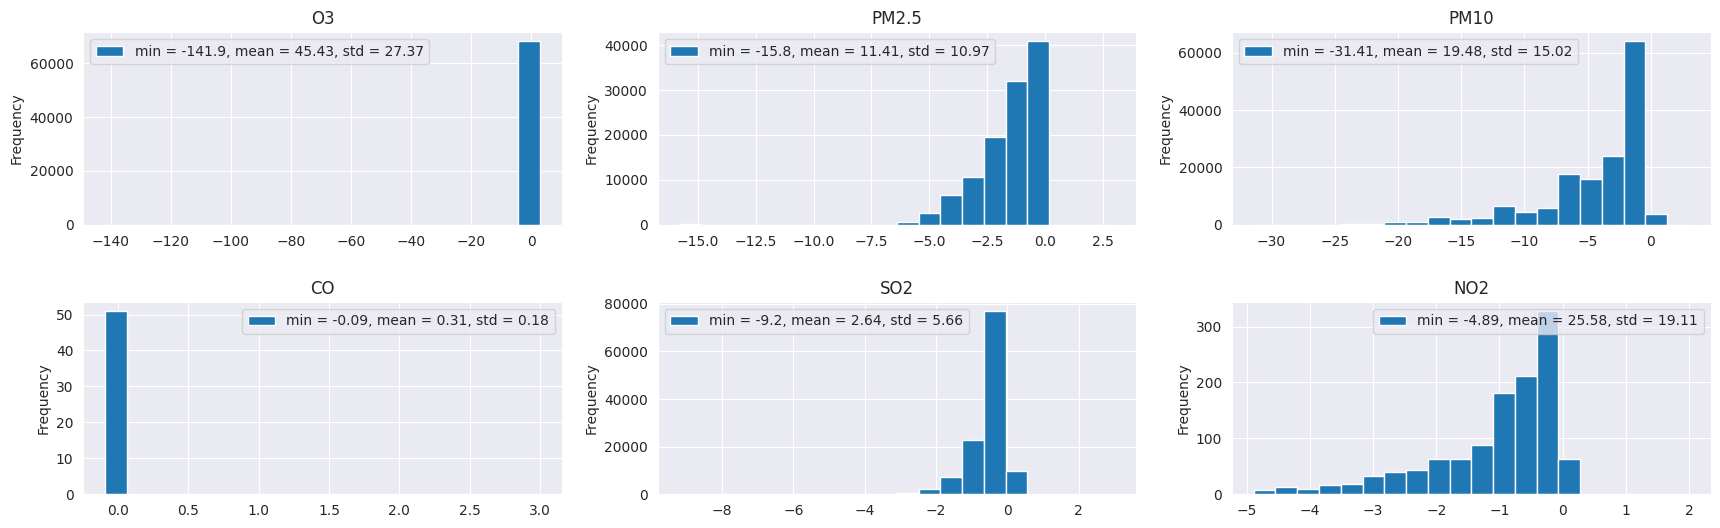

In [12]:
invalid_lines_count = 0
print(f'Доли отрицательных значений по загрязнителям:')
dp_bad = list()
df_means = list()
df_stds = list()

for i in range(len(POL_CODES)):
    bad_mask = df_list[i]['Concentration'] < 0
    dp = df_list[i][bad_mask]
    print_pol_portion(i, dp.shape[0], df_list[i].shape[0])
    invalid_lines_count += dp.shape[0]
    dp_bad.append(dp)
print_all_poll_portion(invalid_lines_count, all_lines_count)

fig = plt.figure(figsize=(21, 6))
for i in range(len(POL_CODES)):
    axn = fig.add_subplot(231 + i)
    dfmean = df_list[i]["Concentration"].mean()
    df_means.append(dfmean)
    dfstd = df_list[i]["Concentration"].std()
    df_stds.append(dfstd)
    dp_bad[i].plot.hist(column=['Concentration'], bins=20, title = POL_NAMES[POL_CODES[i]], ax=axn)
    plt.legend([f'min = {round(dp_bad[i]["Concentration"].min(), 2)}, mean = {round(dfmean, 2)}, std = {round(dfstd, 2)}'])

plt.subplots_adjust(hspace=0.4)

##### Отрицательные значения меньшие std, приведем к нулю. Остальные - к Nan.

In [13]:
if flag_data_clean_up:
    invalid_lines_count = 0
    print(f'Доля отрицательный значений меньших std по загрязнителям:')
    for i in range(len(POL_CODES)):
        bad_mask = (abs(df_list[i]['Concentration']) > df_stds[i]) & (df_list[i]['Concentration'] < 0)
        dp = df_list[i][bad_mask]
        print_pol_portion(i, dp.shape[0], df_list[i].shape[0])
        invalid_lines_count += dp.shape[0]
        df_list[i].loc[bad_mask, 'Concentration'] = np.NaN
        df_list[i].loc[(df_list[i]['Concentration'] <= df_stds[i]) & (df_list[i]['Concentration'] < 0), 'Concentration'] = 0.0
    print_all_poll_portion(invalid_lines_count, all_lines_count)

Доля отрицательный значений меньших std по загрязнителям:
    Загрязнитель   O3       0.0% значений
    Загрязнитель   PM2.5    0.0% значений
    Загрязнитель   PM10     0.08% значений
    Загрязнитель   CO       0.0% значений
    Загрязнитель   SO2      0.0% значений
    Загрязнитель   NO2      0.0% значений
По всем загрязнителям: 0.03 %


##### Проверка временных интервалов измерения отличных от 1 часа. Оценка доли таких интервалов.

In [18]:
import warnings

non_hour_lines_count = 0
df_df_days = list()
print(f'Доли интервалов, неравных 1 часу, по загрязнителям:')
for i in range(len(POL_CODES)):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", message="divide by zero encountered in divide")
        df_list[i]['DatetimeEnd'] = pd.to_datetime(df_list[i]['DatetimeEnd'])
    no_hour_mask = df_list[i]['AveragingTime'] != 'hour'
    df_hour_dif = df_list[i][no_hour_mask]
    print_pol_portion(i, df_hour_dif.shape[0], df_list[i].shape[0])
    non_hour_lines_count += df_hour_dif.shape[0]
    if df_hour_dif is not None and df_hour_dif.shape[0] > 0:
        df_df_days.append(df_hour_dif)
        print(f'Другой интервал: {df_hour_dif["AveragingTime"].unique()}')
    else:
       df_df_days.append(None)

Доли интервалов, неравных 1 часу, по загрязнителям:
    Загрязнитель   O3       0.0% значений
    Загрязнитель   PM2.5    0.23% значений
Другой интервал: ['day']
    Загрязнитель   PM10     0.01% значений
Другой интервал: ['day']
    Загрязнитель   CO       0.0% значений
    Загрязнитель   SO2      0.0% значений
    Загрязнитель   NO2      0.0% значений


/tmp/ipykernel_238562/950921257.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[i]['DatetimeEnd'] = pd.to_datetime(df_list[i]['DatetimeEnd'])


##### Замена дневных интервалов на часовые, заполнение, NaN - для концентраций

In [15]:
def get_hour_columns(df_days):
    df_days.assign(AveragingTime = 'hour')
    df_days.assign(Concentration = np.NaN)
    df_dub = df_days.loc[df_days.index.repeat(23),:]
    df_range = df_days.loc[:,'DatetimeEnd'].apply(lambda x: pd.date_range(x - pd.Timedelta(hours=23), x - pd.Timedelta(hours=1), freq='1h'))
    df_dub['DatetimeEnd'] = df_range.explode()
    return df_dub

In [19]:
if flag_data_clean_up:
    for i in range(len(POL_CODES)):
        if df_df_days[i] is None:
            continue
        df_list[i] = pd.concat([df_list[i], get_hour_columns(df_df_days[i])], axis=0, ignore_index=True)

KeyboardInterrupt: 

##### Удаление столбцов Verification, Validity, UnitOfMeasurement, AveragingTime, SamplingPoint

In [20]:
for i in range(len(POL_CODES)):
    df_list[i] = df_list[i].drop(columns= ['Verification', 'Validity', 'UnitOfMeasurement', 'AveragingTime', 'SamplingPoint'])

##### Индексация

In [21]:
for i in range(len(POL_CODES)):
    df_list[i].sort_values(["AirQualityStation", "DatetimeEnd"], ascending = True, inplace=True)
    df_list[i].reset_index(drop=True, inplace=True)
df_list[0].head()

,Countrycode,AirQualityStation,SamplingProcess,Concentration,DatetimeEnd
0,NL,STA-NL00003,SPP-NL_A_UV-P_thermo49i,35.0,2013-01-01 01:00:00+01:00
1,NL,STA-NL00003,SPP-NL_A_chemi_02144,35.0,2013-01-01 01:00:00+01:00
2,NL,STA-NL00003,SPP-NL_A_UV-P_thermo49i,41.0,2013-01-01 02:00:00+01:00
3,NL,STA-NL00003,SPP-NL_A_chemi_02144,41.0,2013-01-01 02:00:00+01:00
4,NL,STA-NL00003,SPP-NL_A_UV-P_thermo49i,41.0,2013-01-01 03:00:00+01:00


**Выводы:**
1. Были удалены данные с пропущенными значениями кода станции и временного интервала, их невозможно использовать.
2. Приведены оценки доли пропущенных, невалидных, отрицательных и нулевых значений концентраций.
3. Все единицы измерения в рамках загрязнителя одинаковы, столбец не несет полезной информации и был удален.
4. Временной интервал измерения за редким исключением составляет 1 час (менее 1% для PM2.5- это интервалы в 1 день). Чтобы не искажать результаты последующих расчетов, строки с интервалов в день были дополнены строками в количестве 23 на каждый час на сутки до DatetimeEnd с теми же данными, кроме концентраций (для них указано значение NaN)
5. Поскольку был зафиксирован интервал измерений длительностью в 1 час, один из столбцов с интервалом даты не несет полезной информации, поэтому столбец DatetimeBegin был удален.
6. Была обнаружена большая часть полностью одинаковых строк. Анализ csv файла датасета показал, что одинаковым строкам соответствуют различные методы измерения, которые у нас в расчет не берутся. При этом проверено, что концентрации для разных методов в датасетах одинаковы. Для данной работы подобные дубликаты не несут никакой полезной информации, потому они были удалены

***
#### Анализ и обработка выбросов
***

##### Анализ выбросов

--------------------------------------------POLLUTANT O3--------------------------------------------



count    4.080000e+06
mean     4.543153e+01
std      2.737244e+01
min     -1.419000e+02
25%      2.522000e+01
50%      4.582000e+01
75%      6.336000e+01
max      2.789600e+02
Name: Concentration, dtype: float64

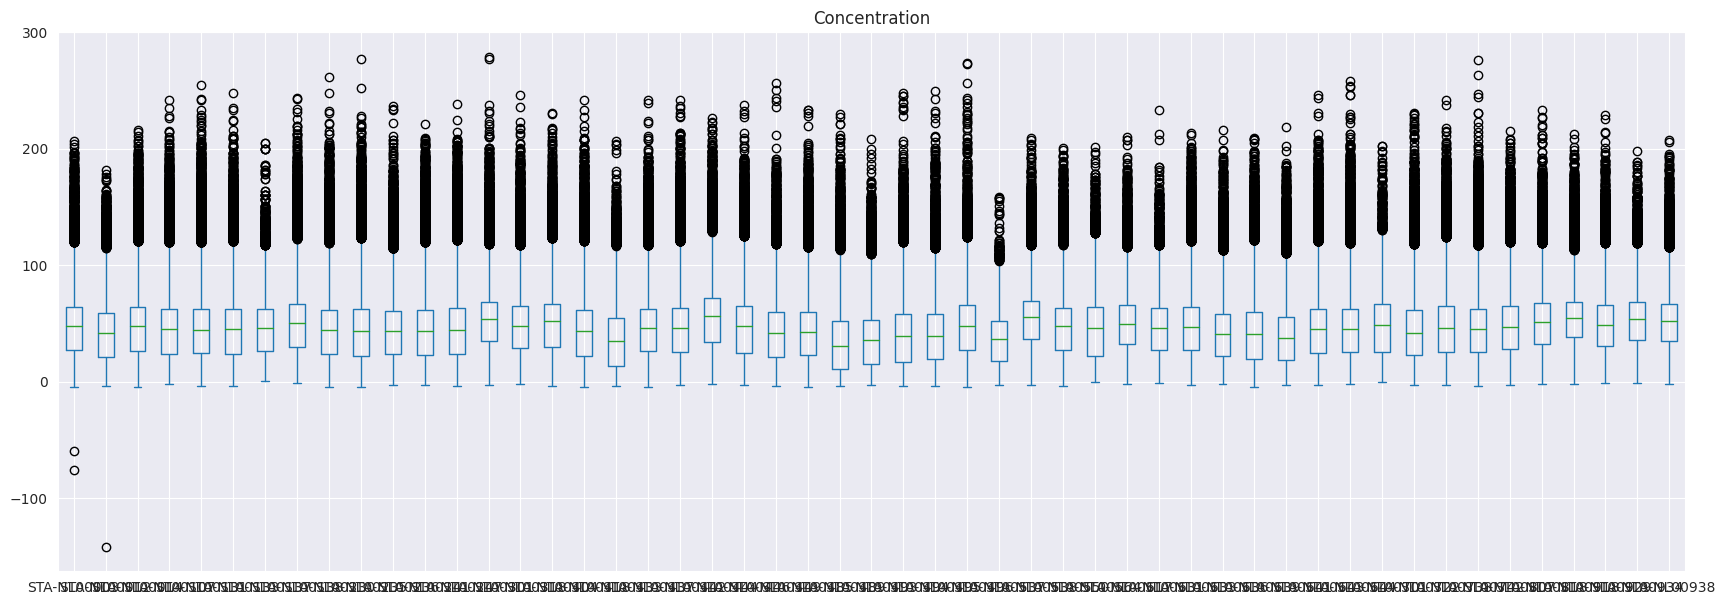

--------------------------------------------POLLUTANT PM2.5--------------------------------------------



count    3.960771e+06
mean     1.140736e+01
std      1.096638e+01
min     -1.580000e+01
25%      4.886000e+00
50%      8.500000e+00
75%      1.473680e+01
max      1.558080e+03
Name: Concentration, dtype: float64

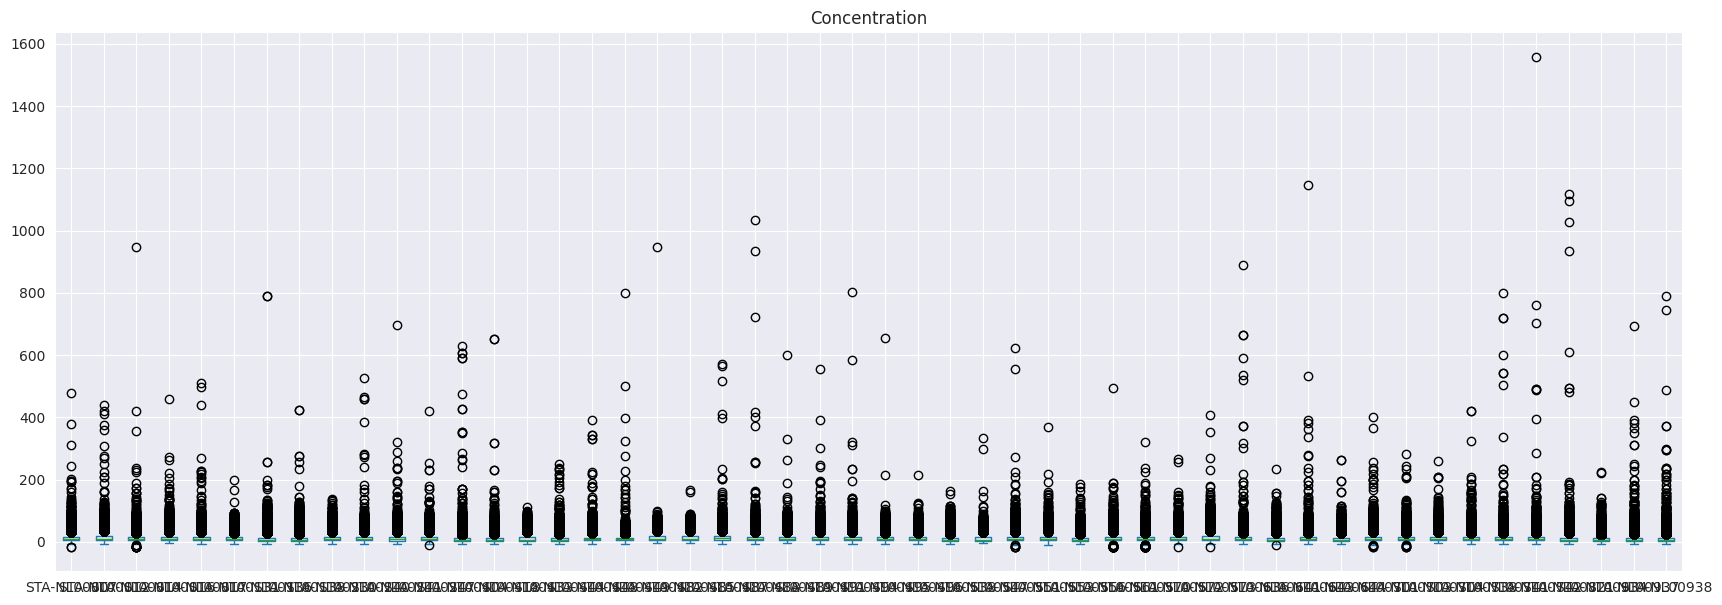

--------------------------------------------POLLUTANT PM10--------------------------------------------



count    6.070628e+06
mean     1.947896e+01
std      1.502127e+01
min     -3.141000e+01
25%      1.080000e+01
50%      1.715200e+01
75%      2.491000e+01
max      1.893710e+03
Name: Concentration, dtype: float64

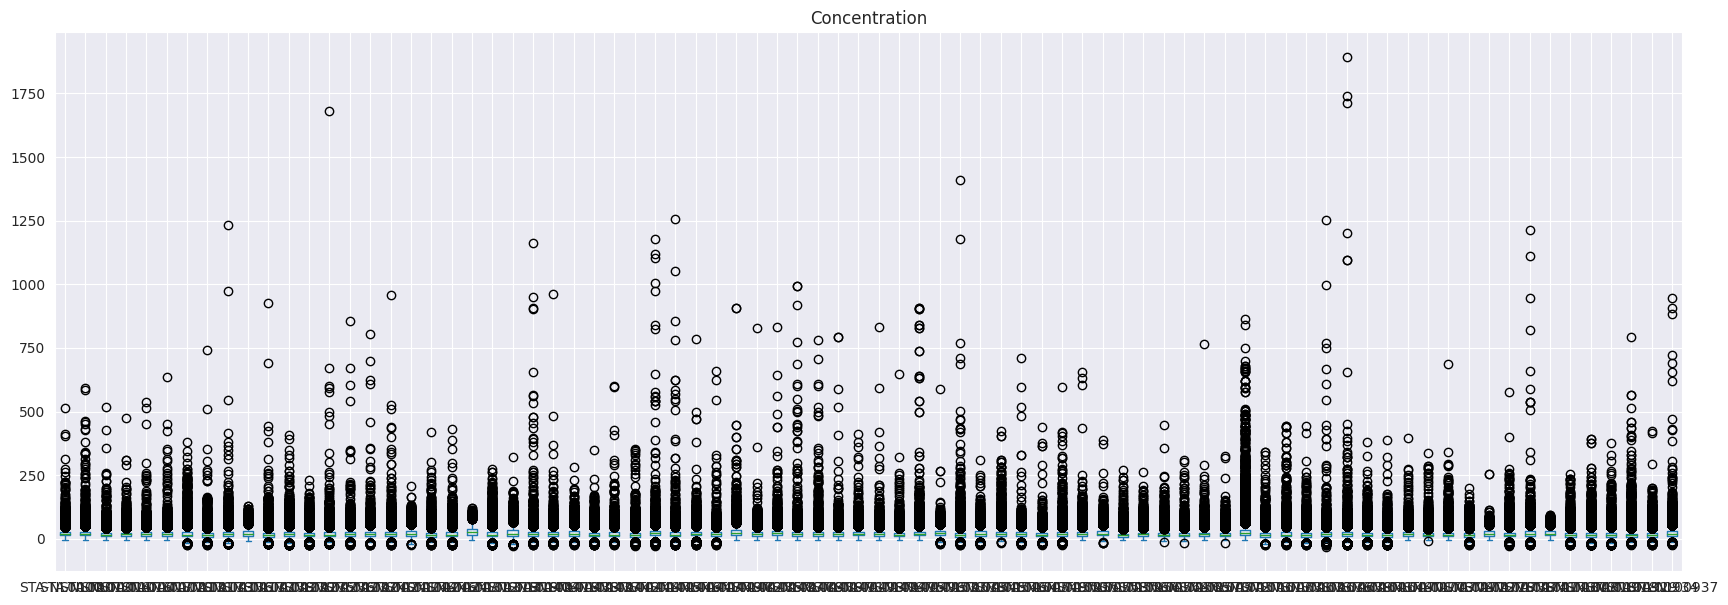

--------------------------------------------POLLUTANT CO--------------------------------------------



count    825599.000000
mean          0.312691
std           0.176082
min          -0.093000
25%           0.208000
50%           0.275000
75%           0.368000
max           8.583000
Name: Concentration, dtype: float64

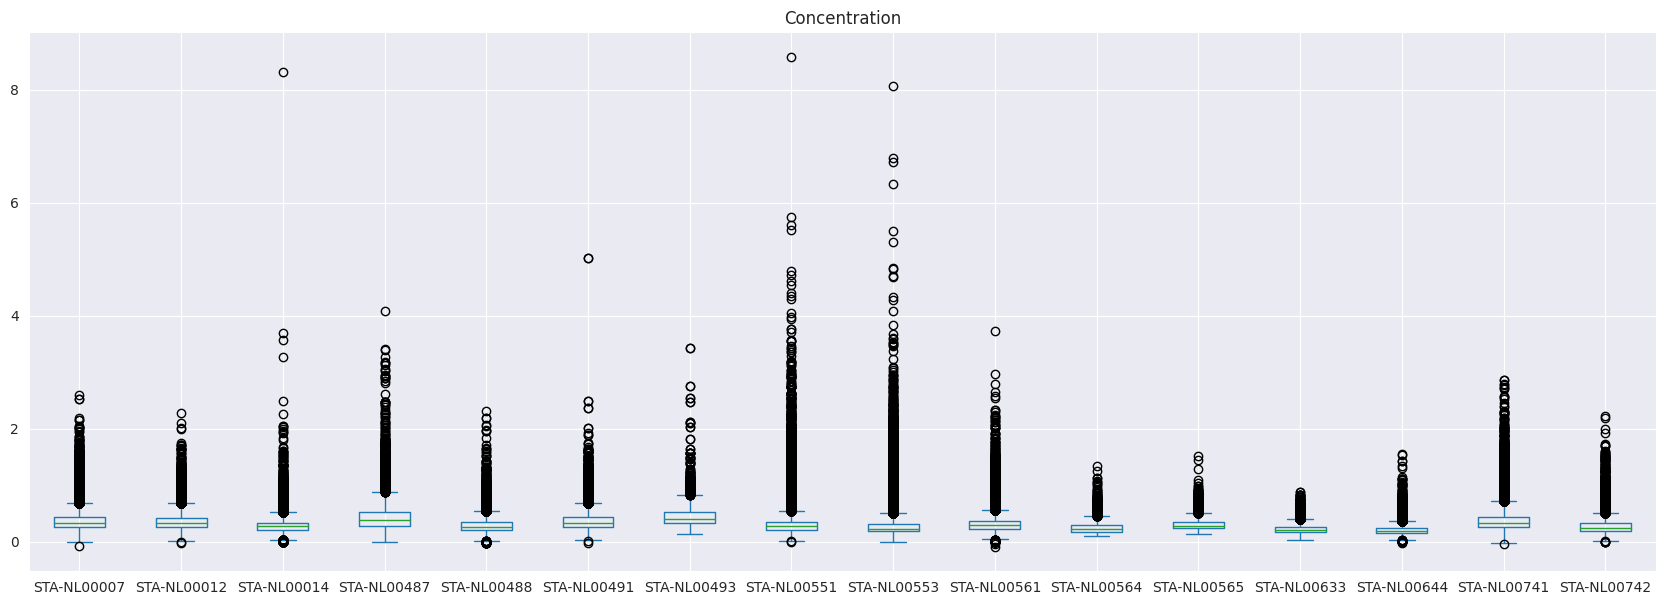

--------------------------------------------POLLUTANT SO2--------------------------------------------



count    1.219188e+06
mean     2.644498e+00
std      5.660271e+00
min     -9.200000e+00
25%      2.700000e-01
50%      1.100000e+00
75%      3.000000e+00
max      7.073000e+02
Name: Concentration, dtype: float64

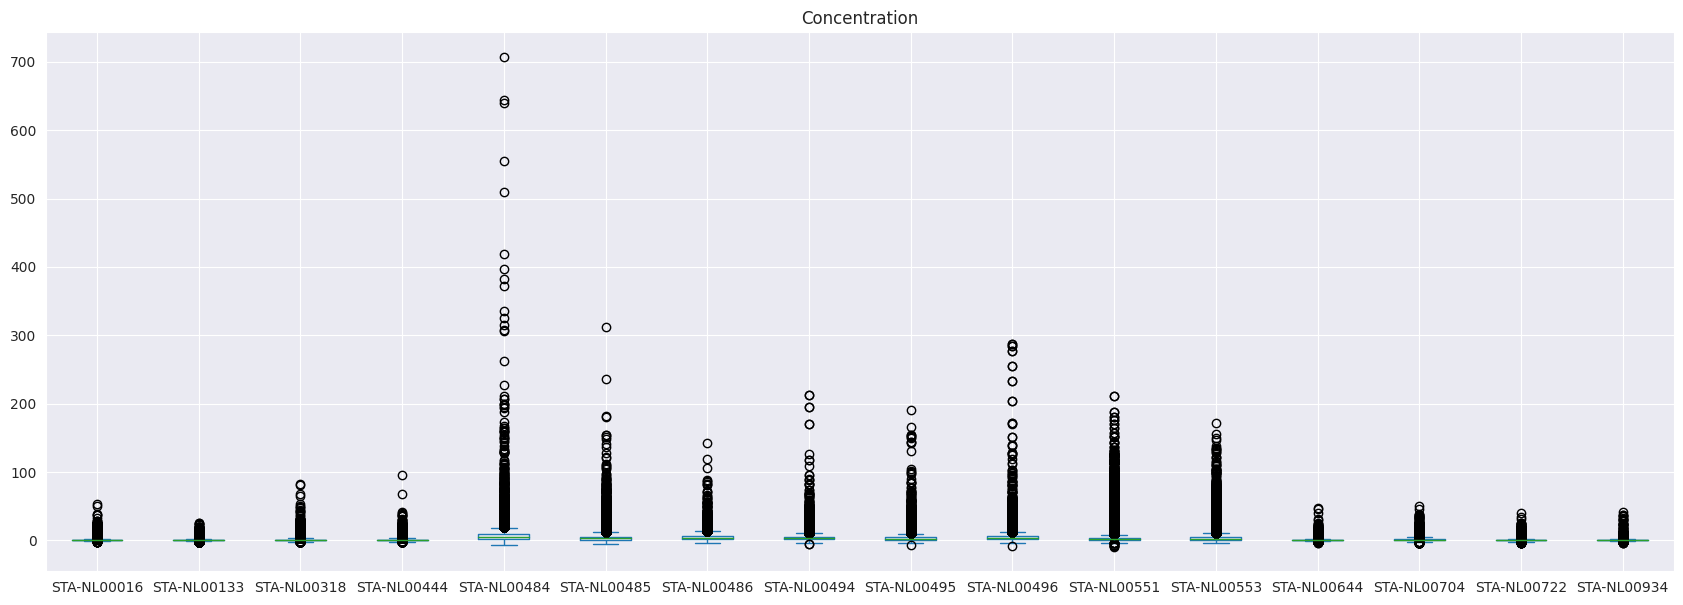

--------------------------------------------POLLUTANT NO2--------------------------------------------



count    3.704214e+06
mean     2.558325e+01
std      1.910708e+01
min     -4.890000e+00
25%      1.100000e+01
50%      2.065000e+01
75%      3.570000e+01
max      6.042000e+02
Name: Concentration, dtype: float64

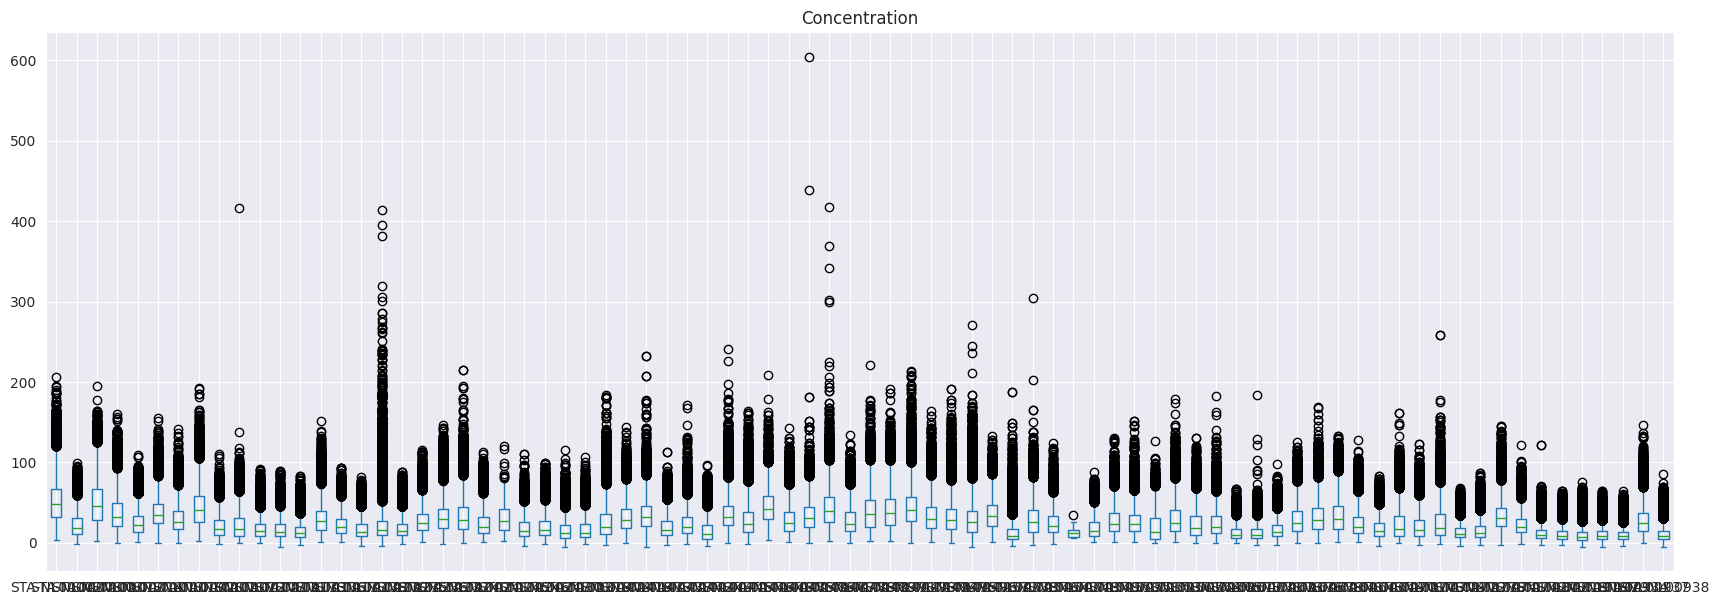

In [47]:
for i in range(len(POL_CODES)):
    print(f'--------------------------------------------POLLUTANT {POL_NAMES[POL_CODES[i]]}--------------------------------------------')
    print()
    display(df_list[i]['Concentration'].describe())
    df_list[i].plot.box(column="Concentration", by="AirQualityStation", figsize=(21, 7))
    plt.show()

##### Оценка выбросов

In [48]:
def get_outliers(frame):
    series = frame['Concentration']
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    mask = (series < (q1 - 1.5 * iqr)) | (series > (q3 + 1.5 * iqr))
    return frame[mask]

In [49]:
pol_stations = dict()
for i in range(len(POL_CODES)):
    pol_stations[POL_CODES[i]] = df_list[i]['AirQualityStation'].unique()

In [50]:
print(f'Доля выбросов в выборке по загрязнителям')
pol_outliers = dict()
for i in range(len(POL_CODES)):
    outliers = pd.DataFrame()
    for station in pol_stations[POL_CODES[i]]:
        outliers_per_station = get_outliers(df_list[i][df_list[i]['AirQualityStation'] == station])
        outliers = pd.concat([outliers, outliers_per_station], ignore_index=True, axis=0)
    pol_outliers[POL_CODES[i]] = outliers
    outliers_all = get_outliers(df_list[i])
    print(f'    Загрязнитель: {POL_NAMES[POL_CODES[i]]} - {round(outliers.shape[0]/df_list[i].shape[0]*100, 2)}% - по станциям, {round(outliers_all.shape[0]/df_list[i].shape[0]*100, 2)}% - вместе')

Доля выбросов в выборке по загрязнителям
    Загрязнитель: O3 - 1.03% - по станциям, 0.96% - вместе
    Загрязнитель: PM2.5 - 5.78% - по станциям, 5.8% - вместе
    Загрязнитель: PM10 - 4.11% - по станциям, 4.66% - вместе
    Загрязнитель: CO - 4.56% - по станциям, 4.48% - вместе
    Загрязнитель: SO2 - 7.22% - по станциям, 8.23% - вместе
    Загрязнитель: NO2 - 2.48% - по станциям, 2.45% - вместе


##### Анализ распределения концентраций в рамках станций

--------------------------------------------POLLUTANT O3--------------------------------------------



count    4.080000e+06
mean     4.543153e+01
std      2.737244e+01
min     -1.419000e+02
25%      2.522000e+01
50%      4.582000e+01
75%      6.336000e+01
max      2.789600e+02
Name: Concentration, dtype: float64


Станции: ['STA-NL00003' 'STA-NL00012' 'STA-NL00014' 'STA-NL00107' 'STA-NL00131'
 'STA-NL00133' 'STA-NL00137' 'STA-NL00138' 'STA-NL00230' 'STA-NL00235'
 'STA-NL00236' 'STA-NL00241' 'STA-NL00247' 'STA-NL00301' 'STA-NL00318'
 'STA-NL00404' 'STA-NL00418' 'STA-NL00433' 'STA-NL00437' 'STA-NL00442'
 'STA-NL00444' 'STA-NL00446' 'STA-NL00449' 'STA-NL00485' 'STA-NL00489'
 'STA-NL00493' 'STA-NL00494' 'STA-NL00495' 'STA-NL00496' 'STA-NL00537'
 'STA-NL00538' 'STA-NL00550' 'STA-NL00564' 'STA-NL00617' 'STA-NL00631'
 'STA-NL00633' 'STA-NL00636' 'STA-NL00639' 'STA-NL00641' 'STA-NL00643'
 'STA-NL00644' 'STA-NL00701' 'STA-NL00722' 'STA-NL00738' 'STA-NL00742'
 'STA-NL00807' 'STA-NL00818' 'STA-NL00918' 'STA-NL00929' 'STA-NL00934'
 'STA-NL00938']


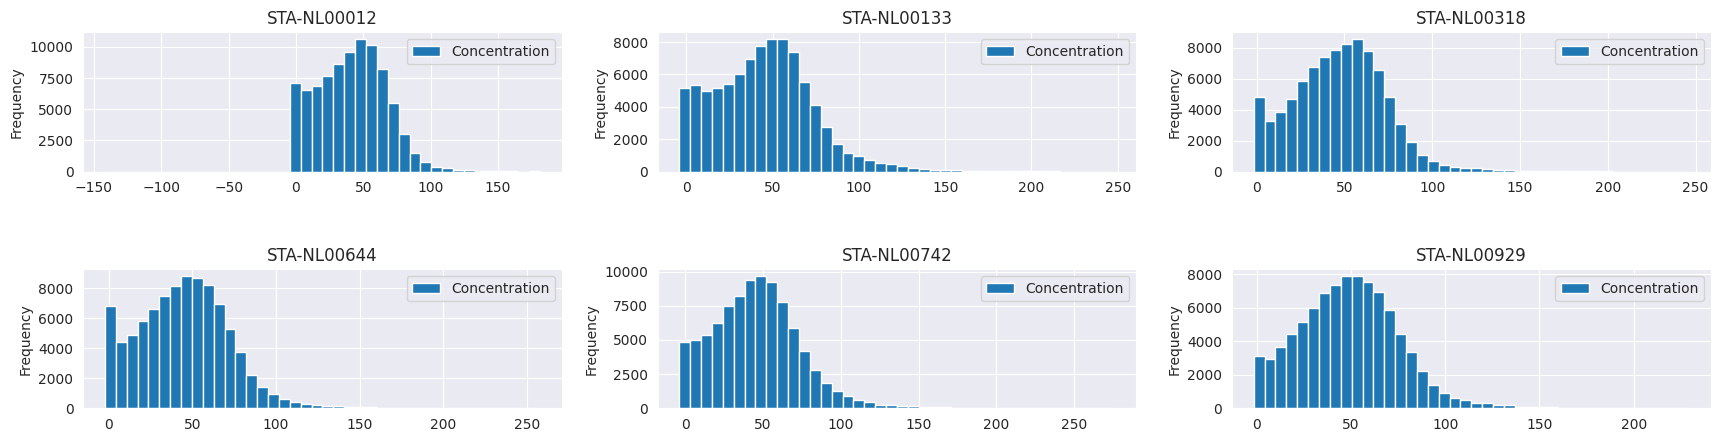

--------------------------------------------POLLUTANT PM2.5--------------------------------------------



count    3.960771e+06
mean     1.140736e+01
std      1.096638e+01
min     -1.580000e+01
25%      4.886000e+00
50%      8.500000e+00
75%      1.473680e+01
max      1.558080e+03
Name: Concentration, dtype: float64


Станции: ['STA-NL00007' 'STA-NL00012' 'STA-NL00014' 'STA-NL00016' 'STA-NL00017'
 'STA-NL00131' 'STA-NL00136' 'STA-NL00138' 'STA-NL00230' 'STA-NL00240'
 'STA-NL00241' 'STA-NL00247' 'STA-NL00404' 'STA-NL00418' 'STA-NL00433'
 'STA-NL00444' 'STA-NL00448' 'STA-NL00449' 'STA-NL00482' 'STA-NL00485'
 'STA-NL00487' 'STA-NL00488' 'STA-NL00489' 'STA-NL00491' 'STA-NL00494'
 'STA-NL00495' 'STA-NL00496' 'STA-NL00538' 'STA-NL00547' 'STA-NL00551'
 'STA-NL00553' 'STA-NL00556' 'STA-NL00561' 'STA-NL00570' 'STA-NL00572'
 'STA-NL00573' 'STA-NL00636' 'STA-NL00641' 'STA-NL00643' 'STA-NL00644'
 'STA-NL00701' 'STA-NL00703' 'STA-NL00704' 'STA-NL00738' 'STA-NL00741'
 'STA-NL00742' 'STA-NL00821' 'STA-NL00934' 'STA-NL00937' 'STA-NL00938']


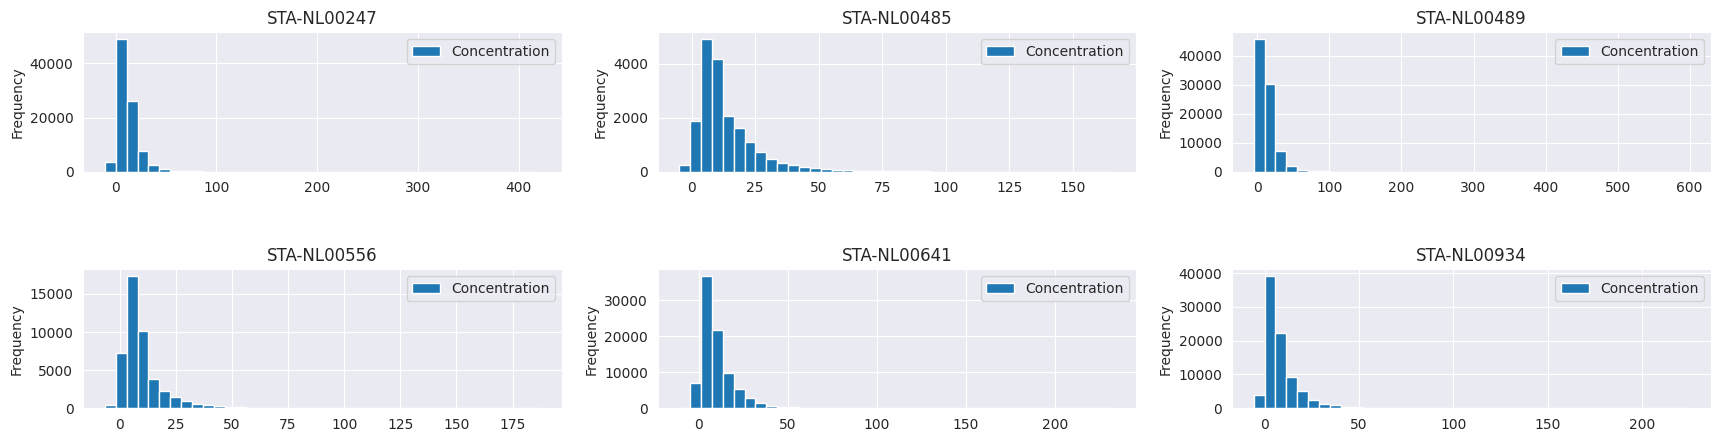

--------------------------------------------POLLUTANT PM10--------------------------------------------



count    6.070628e+06
mean     1.947896e+01
std      1.502127e+01
min     -3.141000e+01
25%      1.080000e+01
50%      1.715200e+01
75%      2.491000e+01
max      1.893710e+03
Name: Concentration, dtype: float64


Станции: ['STA-NL00007' 'STA-NL00012' 'STA-NL00014' 'STA-NL00016' 'STA-NL00017'
 'STA-NL00020' 'STA-NL00131' 'STA-NL00133' 'STA-NL00136' 'STA-NL00137'
 'STA-NL00138' 'STA-NL00230' 'STA-NL00235' 'STA-NL00236' 'STA-NL00237'
 'STA-NL00240' 'STA-NL00241' 'STA-NL00244' 'STA-NL00246' 'STA-NL00247'
 'STA-NL00312' 'STA-NL00318' 'STA-NL00319' 'STA-NL00404' 'STA-NL00418'
 'STA-NL00433' 'STA-NL00437' 'STA-NL00442' 'STA-NL00444' 'STA-NL00445'
 'STA-NL00446' 'STA-NL00447' 'STA-NL00449' 'STA-NL00482' 'STA-NL00485'
 'STA-NL00487' 'STA-NL00488' 'STA-NL00489' 'STA-NL00491' 'STA-NL00493'
 'STA-NL00494' 'STA-NL00495' 'STA-NL00496' 'STA-NL00537' 'STA-NL00538'
 'STA-NL00545' 'STA-NL00546' 'STA-NL00547' 'STA-NL00549' 'STA-NL00550'
 'STA-NL00551' 'STA-NL00553' 'STA-NL00556' 'STA-NL00561' 'STA-NL00564'
 'STA-NL00565' 'STA-NL00570' 'STA-NL00572' 'STA-NL00573' 'STA-NL00617'
 'STA-NL00631' 'STA-NL00633' 'STA-NL00636' 'STA-NL00639' 'STA-NL00641'
 'STA-NL00644' 'STA-NL00701' 'STA-NL00703' 'STA-NL00704' 'STA-NL007

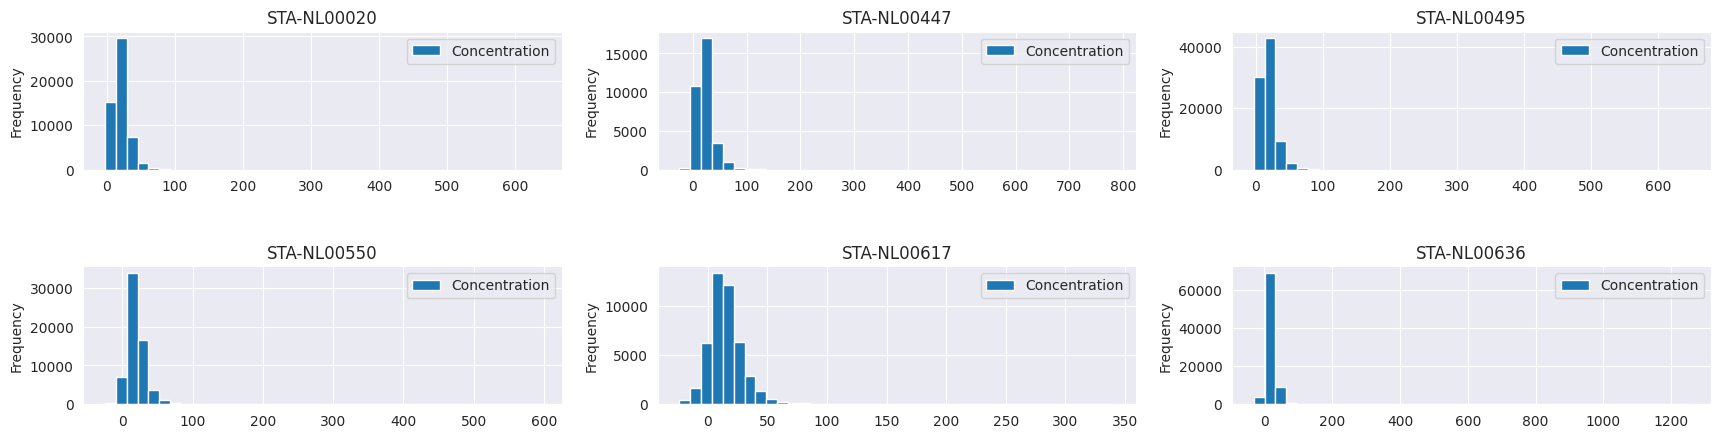

--------------------------------------------POLLUTANT CO--------------------------------------------



count    825599.000000
mean          0.312691
std           0.176082
min          -0.093000
25%           0.208000
50%           0.275000
75%           0.368000
max           8.583000
Name: Concentration, dtype: float64


Станции: ['STA-NL00007' 'STA-NL00012' 'STA-NL00014' 'STA-NL00487' 'STA-NL00488'
 'STA-NL00491' 'STA-NL00493' 'STA-NL00551' 'STA-NL00553' 'STA-NL00561'
 'STA-NL00564' 'STA-NL00565' 'STA-NL00633' 'STA-NL00644' 'STA-NL00741'
 'STA-NL00742']


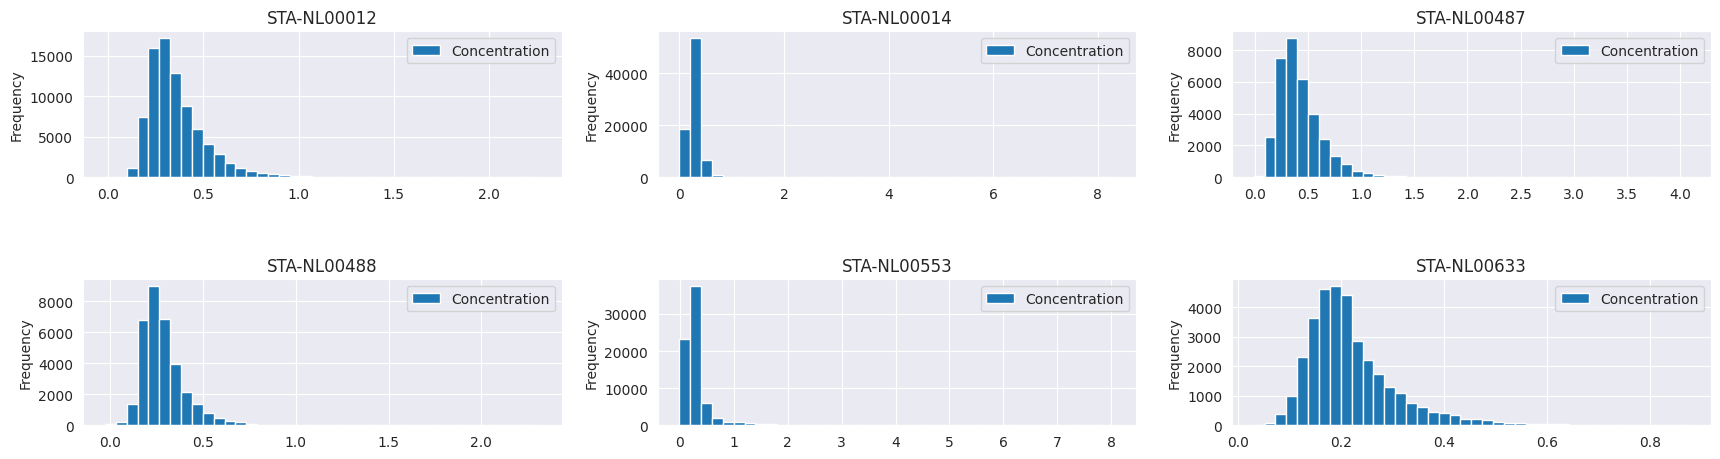

--------------------------------------------POLLUTANT SO2--------------------------------------------



count    1.219188e+06
mean     2.644498e+00
std      5.660271e+00
min     -9.200000e+00
25%      2.700000e-01
50%      1.100000e+00
75%      3.000000e+00
max      7.073000e+02
Name: Concentration, dtype: float64


Станции: ['STA-NL00016' 'STA-NL00133' 'STA-NL00318' 'STA-NL00444' 'STA-NL00484'
 'STA-NL00485' 'STA-NL00486' 'STA-NL00494' 'STA-NL00495' 'STA-NL00496'
 'STA-NL00551' 'STA-NL00553' 'STA-NL00644' 'STA-NL00704' 'STA-NL00722'
 'STA-NL00934']


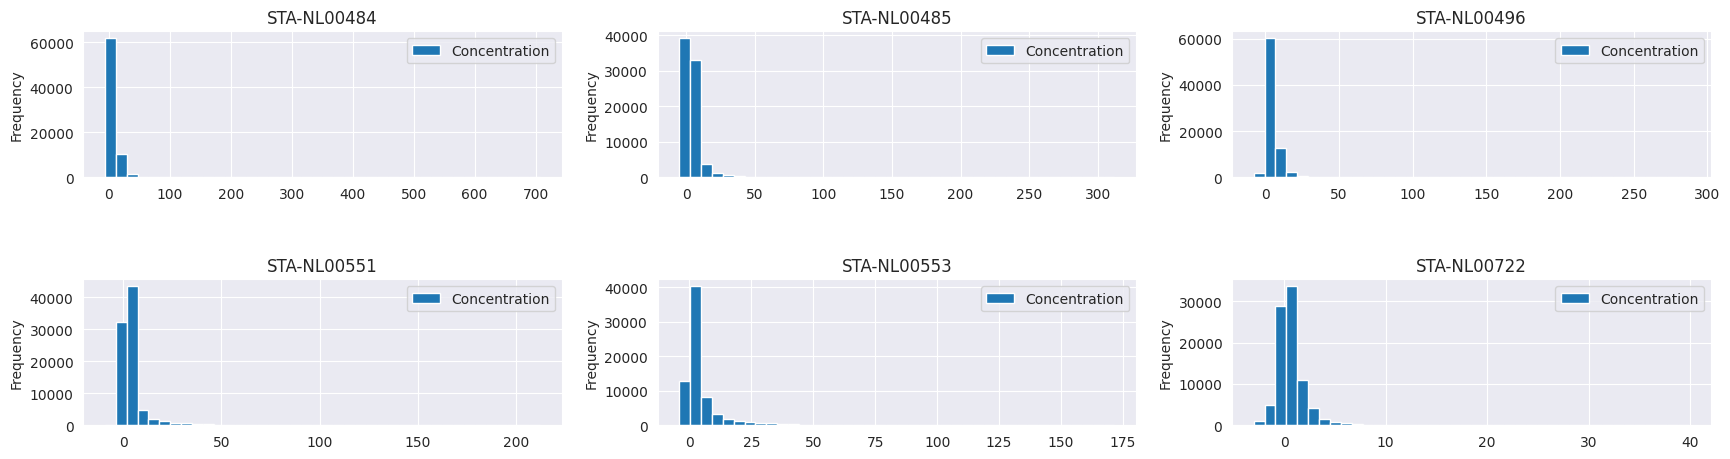

--------------------------------------------POLLUTANT NO2--------------------------------------------



count    3.704214e+06
mean     2.558325e+01
std      1.910708e+01
min     -4.890000e+00
25%      1.100000e+01
50%      2.065000e+01
75%      3.570000e+01
max      6.042000e+02
Name: Concentration, dtype: float64


Станции: ['STA-NL00002' 'STA-NL00003' 'STA-NL00007' 'STA-NL00012' 'STA-NL00014'
 'STA-NL00017' 'STA-NL00019' 'STA-NL00020' 'STA-NL00021' 'STA-NL00022'
 'STA-NL00107' 'STA-NL00131' 'STA-NL00133' 'STA-NL00136' 'STA-NL00137'
 'STA-NL00138' 'STA-NL00230' 'STA-NL00235' 'STA-NL00236' 'STA-NL00237'
 'STA-NL00240' 'STA-NL00241' 'STA-NL00245' 'STA-NL00246' 'STA-NL00247'
 'STA-NL00301' 'STA-NL00318' 'STA-NL00404' 'STA-NL00418' 'STA-NL00433'
 'STA-NL00437' 'STA-NL00442' 'STA-NL00444' 'STA-NL00445' 'STA-NL00446'
 'STA-NL00448' 'STA-NL00485' 'STA-NL00486' 'STA-NL00487' 'STA-NL00488'
 'STA-NL00489' 'STA-NL00491' 'STA-NL00493' 'STA-NL00494' 'STA-NL00495'
 'STA-NL00496' 'STA-NL00537' 'STA-NL00538' 'STA-NL00546' 'STA-NL00547'
 'STA-NL00548' 'STA-NL00549' 'STA-NL00550' 'STA-NL00551' 'STA-NL00553'
 'STA-NL00561' 'STA-NL00564' 'STA-NL00565' 'STA-NL00617' 'STA-NL00631'
 'STA-NL00633' 'STA-NL00636' 'STA-NL00639' 'STA-NL00641' 'STA-NL00643'
 'STA-NL00644' 'STA-NL00701' 'STA-NL00703' 'STA-NL00704' 'STA-NL007

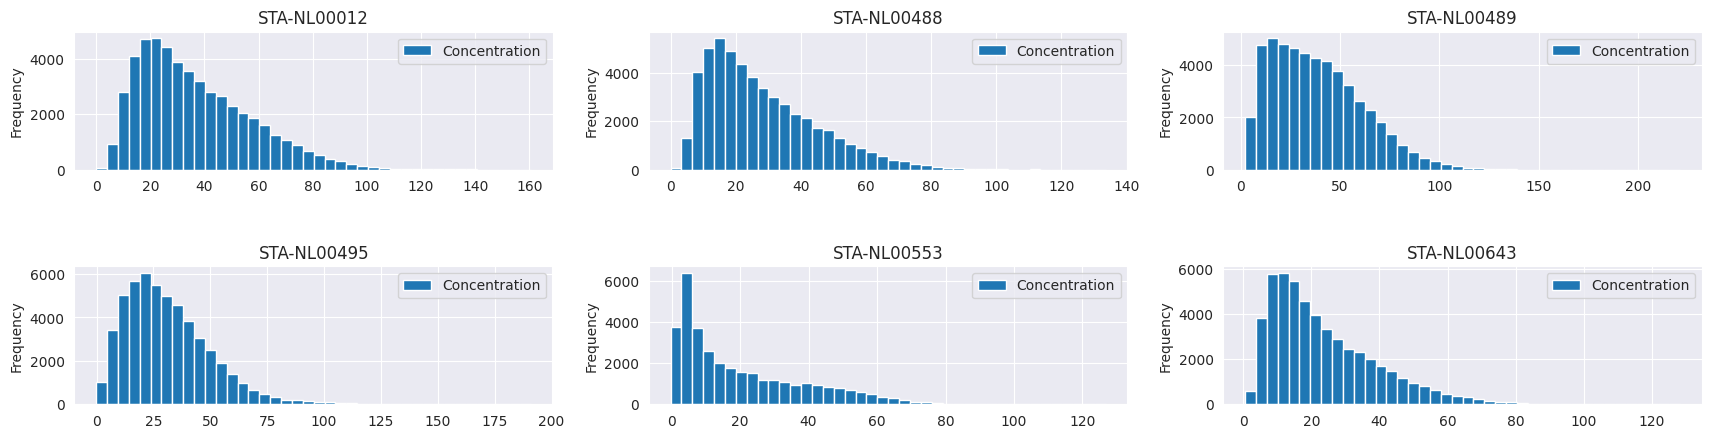

In [51]:
PLOTS_IN_LINE = 3

for i in range(len(POL_CODES)):
    print(f'--------------------------------------------POLLUTANT {POL_NAMES[POL_CODES[i]]}--------------------------------------------')
    print()
    display(df_list[i]['Concentration'].describe())
    stations = df_list[i]['AirQualityStation'].unique()
    print()
    print(f'Станции: {stations}')
    df_list[i].reset_index(inplace=True, drop=True)
    plots_lines_count = math.ceil(len(stations)/PLOTS_IN_LINE)
    some_rand_stat = stations[np.random.choice(len(stations), size=min(len(stations), 6), replace=False)]
    df_list[i][df_list[i]['AirQualityStation'].isin(some_rand_stat)].plot.hist(column=["Concentration"], by="AirQualityStation", figsize=(21, 3*plots_lines_count), bins=40, subplots=True, layout=(plots_lines_count, PLOTS_IN_LINE))
    plt.subplots_adjust(hspace=0.7)
    plt.show()

**Выводы:**
1. Имеются существенные (на 1-2 порядка) выбросы по всем загрязнителям. Но таких выбросов не много и они соответствуют всего нескольким станциям.
2. Есть станции с выбросами значительно большими, чем на других станциях. Причем и количество таких выбросов не единично, что может свидетельствовать о том, что это часть их технологического процесса, а не случайность.
3. Наиболее значительны выбросы у PM2.5, PM10, SO2 (на 2 порядка). Данные загрязнители являются продуктом работы индустриальных предприятий и вполне могут соответствовать реальным значениям, связанным с нештатными ситуациями. Их необходимо учитывать и рассмотреть отдельно.
4. Для PM2.5 и SO2 доля выбросов максимальна и составляет более 6%. Для О3 - минимальна, менее 1%.
5Как правило, концентрации в разрезе станций имеют положительно скошенное распределение с одним пиком. Значения среднего и медианы близки, медиана немного меньше.
6. У О3 имеется второй пик вблизи нуля.

***
#### Анализ корреляций между загрязнителями
***

##### Подготовка dataframe с усредненными по станциям концентрациями на каждый час. Загрязнители сгруппированы по столбцам одного dataframe

In [52]:
df_mean_list = list()
for i in range(len(POL_CODES)):
    df_mean_list.append(df_list[i].groupby('DatetimeEnd', as_index=False)['Concentration'].mean())
    df_mean_list[i].rename(columns={'Concentration': POL_NAMES[POL_CODES[i]]}, inplace=True)
df_ts = reduce(lambda df1, df2: df1.merge(df2, how='outer', left_on=['DatetimeEnd'], right_on=['DatetimeEnd']), df_mean_list)
print(df_ts.shape[0])
df_ts.head()

85734


,DatetimeEnd,O3,PM2.5,PM10,CO,SO2,NO2
0,2013-01-01 01:00:00+01:00,52.147174,100.810000,143.181521,0.310870,4.563571,18.144539
1,2013-01-01 02:00:00+01:00,53.285870,41.575238,47.030726,0.308304,3.797857,14.554255
2,2013-01-01 03:00:00+01:00,54.648140,17.358571,19.887658,0.289609,3.405000,13.046099
3,2013-01-01 04:00:00+01:00,55.068182,12.400952,13.581819,0.280174,3.077143,13.544397
4,2013-01-01 05:00:00+01:00,53.998667,9.770000,12.556446,0.268565,2.827143,13.665036


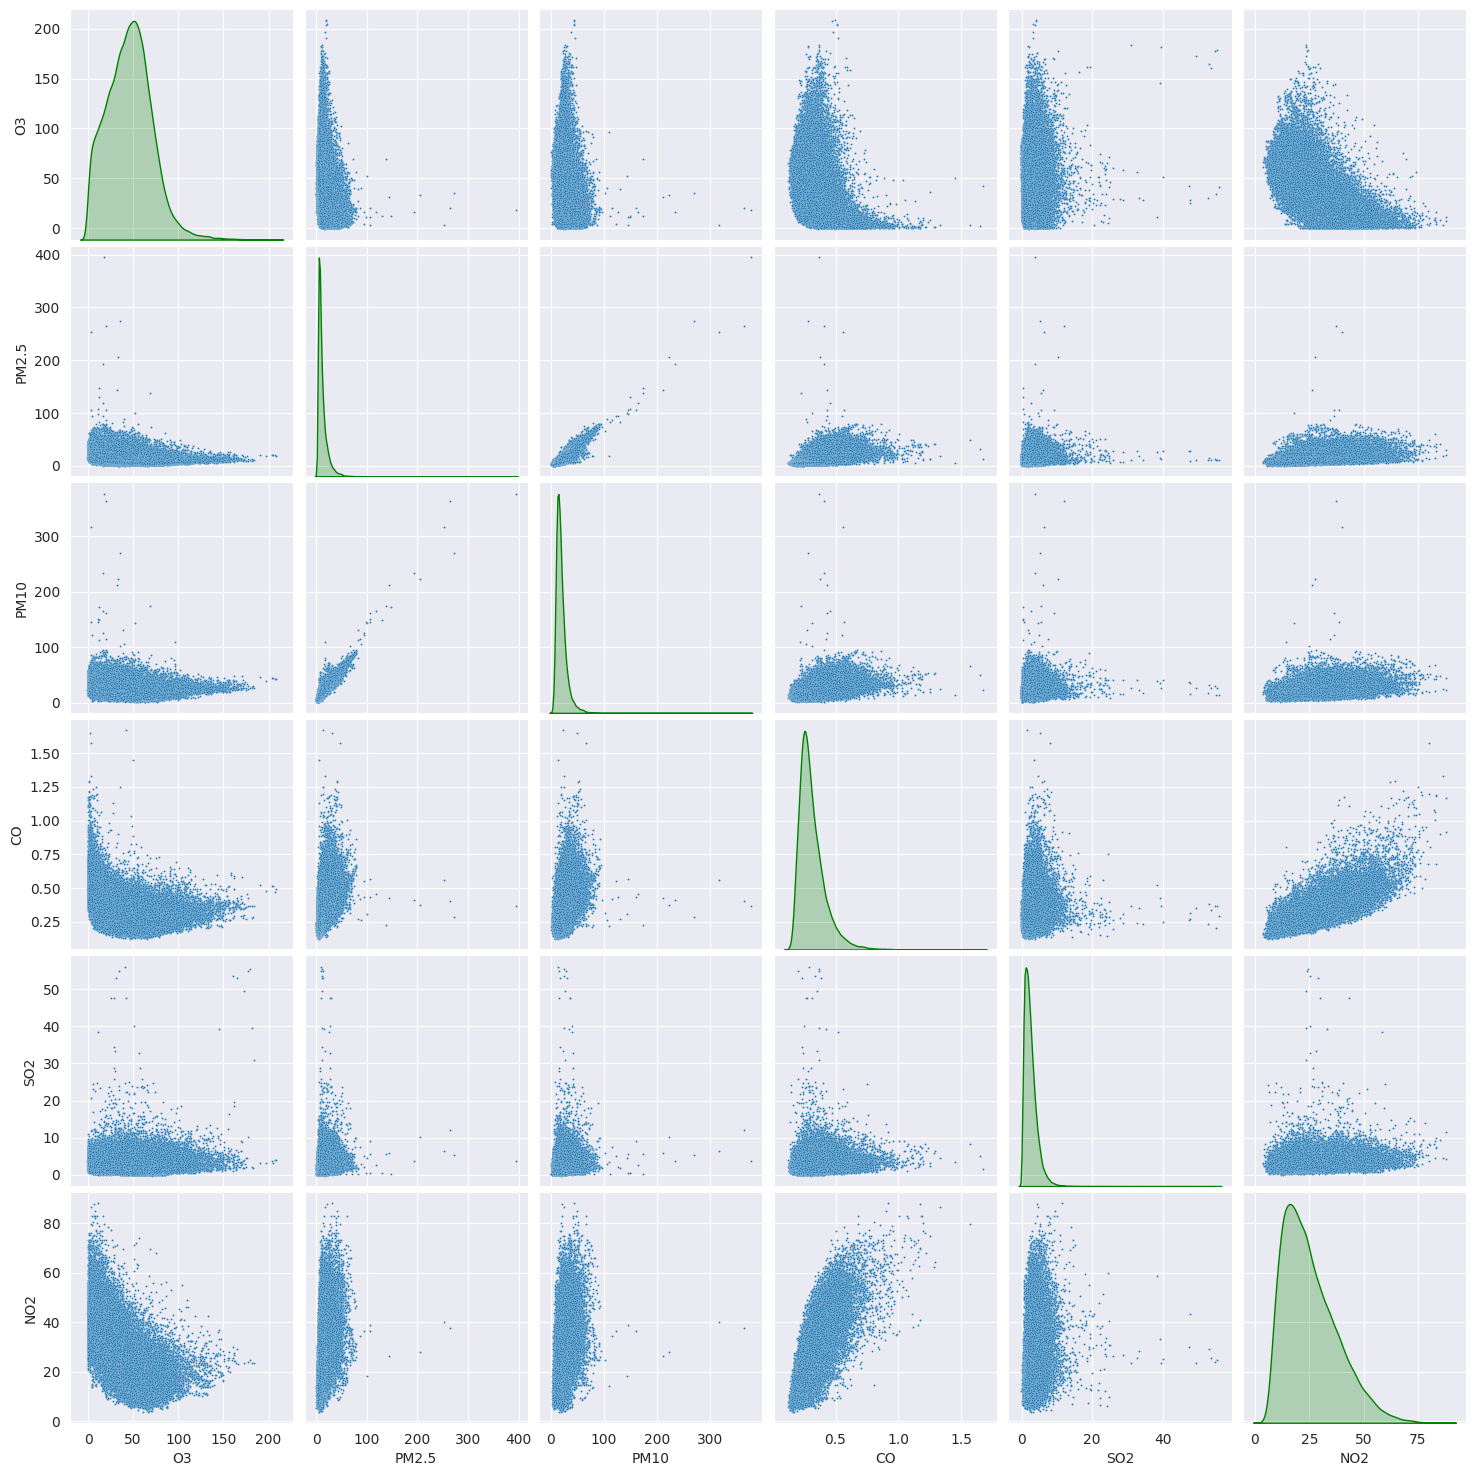

In [53]:
sns.pairplot(df_ts, diag_kind='kde', kind='scatter', plot_kws={"s": 2}, diag_kws={'color':'green'})

##### Коэффициенты корреляции

<AxesSubplot: >

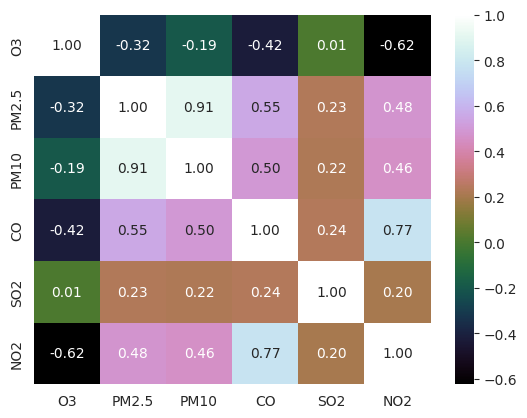

In [54]:
sns.heatmap(df_ts.loc[:, POL_NAMES.values()].corr(), annot=True, fmt=".2f", cmap='cubehelix')

*Выводы:*
1. Видна очень сильная корреляция между PM2.5 и PM10, что понятно, потому что у них один источник - сжигание угля и проч. К тому же возможно при измерении PM10 частично учитываются и PM2.5.
2. Есть умеренная корреляция между CO и PM2.5/PM10, , что понятно, потому что у них один источник - сжигание угля и проч.
3. Корреляция между SO2 и PM2.5/PM10 очень слабая, хотя у них предположительно также один источник.
4. Видна сильная концентрация между CO и NO2, что понятно, потому что у них один источник - сжигание дизельного топлива.
5. Имеется довольная сильная отрицательная корреляция между O3 и NO2. Связано это с механизмом формирования ground level ozone (O3) из (в том числе) NOx. Таким образом О3 преобразовываясь из NO2 снижает концентрацию последнего.

***
#### Анализ в разрезе Метаданных о станциях
***

##### Загрузка метаданных, фильтр по требуемым загрязнителям

In [22]:
mdf = pd.read_csv(METADATA_CSV_PATH, sep='\t', usecols=METADATA_USE_COLUMNS)
pol_urls = {POL_URL + str(x):x for x in POL_CODES}
mdf = mdf[mdf['AirPollutantCode'].isin(pol_urls.keys())]
mdf.replace({'AirPollutantCode': pol_urls}, inplace=True)
print(f'Lines count: {mdf.shape[0]}')
mdf.head()

Lines count: 32480


,Countrycode,AirQualityStation,SamplingProces,AirPollutantCode,Longitude,Latitude,Altitude,AirQualityStationType,AirQualityStationArea
0,AD,STA-AD0942A,SPP-AD0942A-0001-API100E,1,1.539138,42.509694,1080.0,background,urban
1,AD,STA-AD0942A,SPP-AD0942A-0005-TEOM1400A,5,1.539138,42.509694,1080.0,background,urban
2,AD,STA-AD0942A,SPP-AD0942A-0007-API400E,7,1.539138,42.509694,1080.0,background,urban
3,AD,STA-AD0942A,SPP-AD0942A-0008-API200E,8,1.539138,42.509694,1080.0,background,urban
5,AD,STA-AD0942A,SPP-AD0942A-0010-API300E,10,1.539138,42.509694,1080.0,background,urban


##### Фильтрация метаданных по коду страны, если он задан

In [23]:
if country_code is not None and len(country_code) > 0:
    country_cond = mdf['Countrycode'] == country_code
    mdf = mdf[country_cond]
    print(f'Отфильтровано по стране: {country_code}. Всего станций: {mdf.shape[0]}')

Отфильтровано по стране: NL. Всего станций: 591


#### Проверка метаданных на дубликаты

In [24]:
mdf[mdf.duplicated()]

,Countrycode,AirQualityStation,SamplingProces,AirPollutantCode,Longitude,Latitude,Altitude,AirQualityStationType,AirQualityStationArea
50381,NL,STA-NL00489,SPP-NL_A_UV-P_thermo49c,7,4.580058,51.869431,0.0,traffic,urban
50453,NL,STA-NL00495,SPP-NL_A_UV-P_thermo49c,7,4.228025,51.932039,0.0,industrial,urban
50476,NL,STA-NL00496,SPP-NL_A_UV-P_thermo49c,7,4.121944,51.977803,0.0,industrial,rural


Найдены дубликаты. Проверены вручную по файлу метаданных. Не все столбцы были загружени. В данном случае столбцы ObservationDateBegin и ObservationDateEnd различны. Но для нас это не несет полезной информации. Данные дубликаты можно удалить

In [25]:
mdf.drop_duplicates()

,Countrycode,AirQualityStation,SamplingProces,AirPollutantCode,Longitude,Latitude,Altitude,AirQualityStationType,AirQualityStationArea
49766,NL,STA-NL00002,SPP-NL_A_chemi_API200,8,4.875750,52.385422,4.0,traffic,urban
49767,NL,STA-NL00002,SPP-NL_A_chemi_02144,8,4.875750,52.385422,4.0,traffic,urban
49772,NL,STA-NL00003,SPP-NL_A_chemi_02144,7,4.943822,52.389314,1.0,background,urban
49773,NL,STA-NL00003,SPP-NL_A_UV-P_thermo49i,7,4.943822,52.389314,1.0,background,urban
49774,NL,STA-NL00003,SPP-NL_A_chemi_02144,8,4.943822,52.389314,1.0,background,urban
...,...,...,...,...,...,...,...,...,...
51053,NL,STA-NL00938,SPP-NL_A_chemi_02144,7,6.608937,53.246535,-1.0,background,suburban
51054,NL,STA-NL00938,SPP-NL_A_chemi_API200E,8,6.608937,53.246535,-1.0,background,suburban
51055,NL,STA-NL00938,SPP-NL_A_chemi_02144,8,6.608937,53.246535,-1.0,background,suburban
51062,NL,STA-NL00938,SPP-NL_N_gravi_derenda,6001,6.608937,53.246535,-1.0,background,suburban


##### Объединение данных об измерениях станций с метаданными

In [26]:
for i in range(len(POL_CODES)):
    df_list[i] = pd.merge(df_list[i], mdf, how='left', left_on=['Countrycode', 'AirQualityStation', 'SamplingProcess'], right_on=['Countrycode', 'AirQualityStation', 'SamplingProces'])
df_list[0].head()

,Countrycode,AirQualityStation,SamplingProcess,Concentration,DatetimeEnd,SamplingProces,AirPollutantCode,Longitude,Latitude,Altitude,AirQualityStationType,AirQualityStationArea
0,NL,STA-NL00003,SPP-NL_A_UV-P_thermo49i,35.0,2013-01-01 01:00:00+01:00,SPP-NL_A_UV-P_thermo49i,7,4.943822,52.389314,1.0,background,urban
1,NL,STA-NL00003,SPP-NL_A_chemi_02144,35.0,2013-01-01 01:00:00+01:00,SPP-NL_A_chemi_02144,7,4.943822,52.389314,1.0,background,urban
2,NL,STA-NL00003,SPP-NL_A_chemi_02144,35.0,2013-01-01 01:00:00+01:00,SPP-NL_A_chemi_02144,8,4.943822,52.389314,1.0,background,urban
3,NL,STA-NL00003,SPP-NL_A_UV-P_thermo49i,41.0,2013-01-01 02:00:00+01:00,SPP-NL_A_UV-P_thermo49i,7,4.943822,52.389314,1.0,background,urban
4,NL,STA-NL00003,SPP-NL_A_chemi_02144,41.0,2013-01-01 02:00:00+01:00,SPP-NL_A_chemi_02144,7,4.943822,52.389314,1.0,background,urban


##### Сравнение средних концентраций в разрезе типа местности, где размещены станции: rural (сельскохозяйственная) и urban (урбанизированная), suburban (промежуточная)

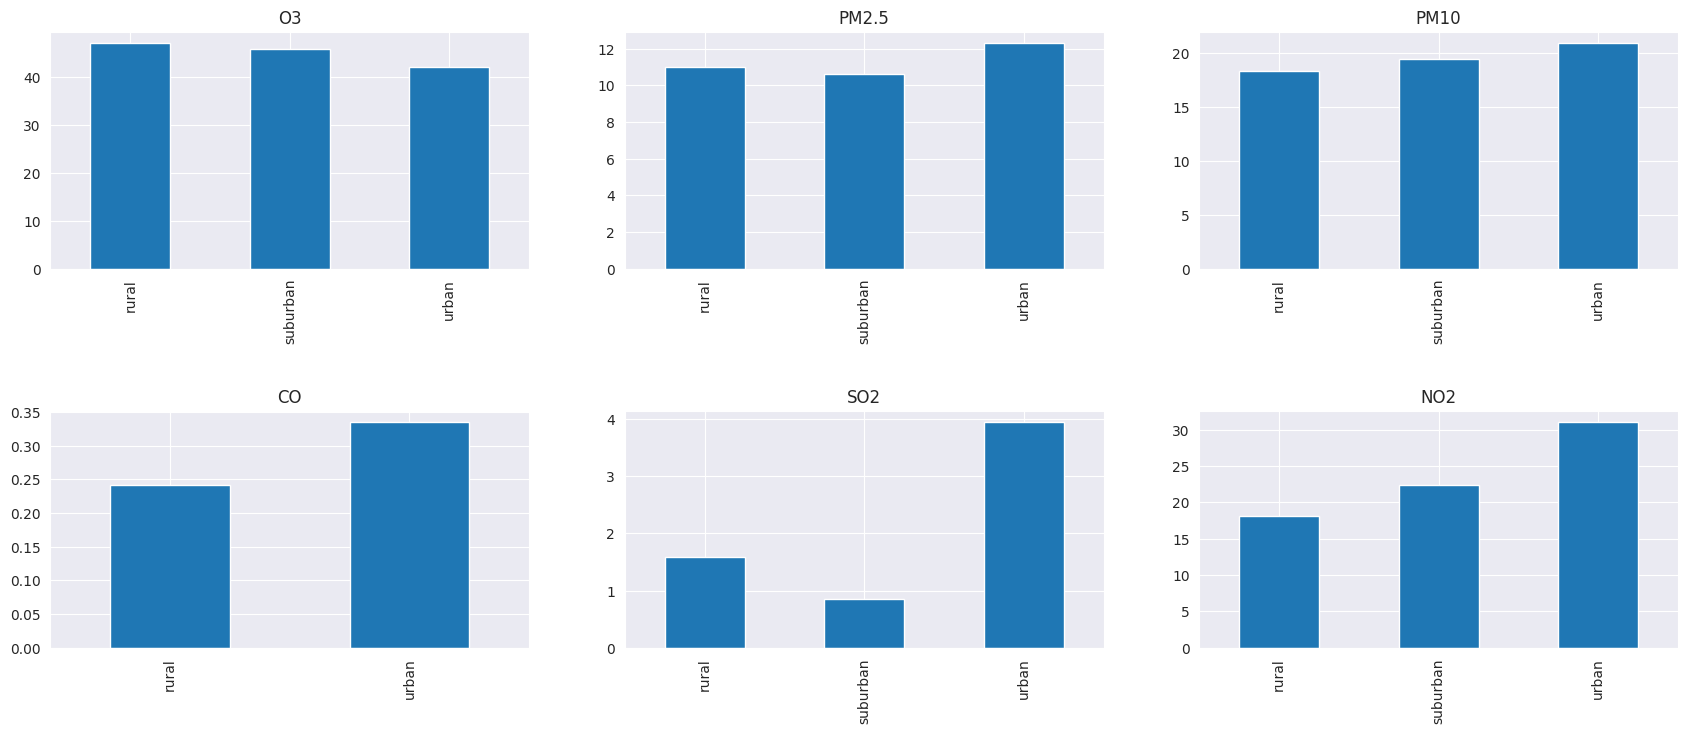

In [41]:
fig = plt.figure(figsize=(21, 8))
station_types = ['rural', 'urban', 'suburban']
for i in range(len(POL_CODES)):
    axn = fig.add_subplot(231 + i)
    df_list[i].groupby(['AirQualityStationArea'], as_index=False)['Concentration'].mean().plot.bar(title = POL_NAMES[POL_CODES[i]], x='AirQualityStationArea', xlabel='', ax=axn)
    plt.legend('', frameon=False)
plt.subplots_adjust(hspace=0.6)

*Выводы:*
1. В среднем концентрации О3, PM2.5, PM10 не зависят от типа местности.
2. Концентрации CO в урбанизированной местности немного выше, чем в сельской. По suburban местности данных нет.
3. Концентрации SO2 максимальна в урбанизированной местности (в 2 раза выше, чем в сельской), что вероятно связано с наличием там заводов и тепловых станций. Почему в suburban местности средняя концентрация почти в 2 раза меньше, чем в сельской, неясно.
4. Концентрации NO2 максимальна в урбанизированной местности (в 1.5 раза выше, чем в сельской), и немного выше в suburban. Что вероятно связано с большим количеством транспорта в них.

##### Сравнение средних концентраций в разрезе направленности станций: background (нет доминирующих источников), industrial (источники - заводы, теплостанции и проч) и traffic (источники - транспорт)

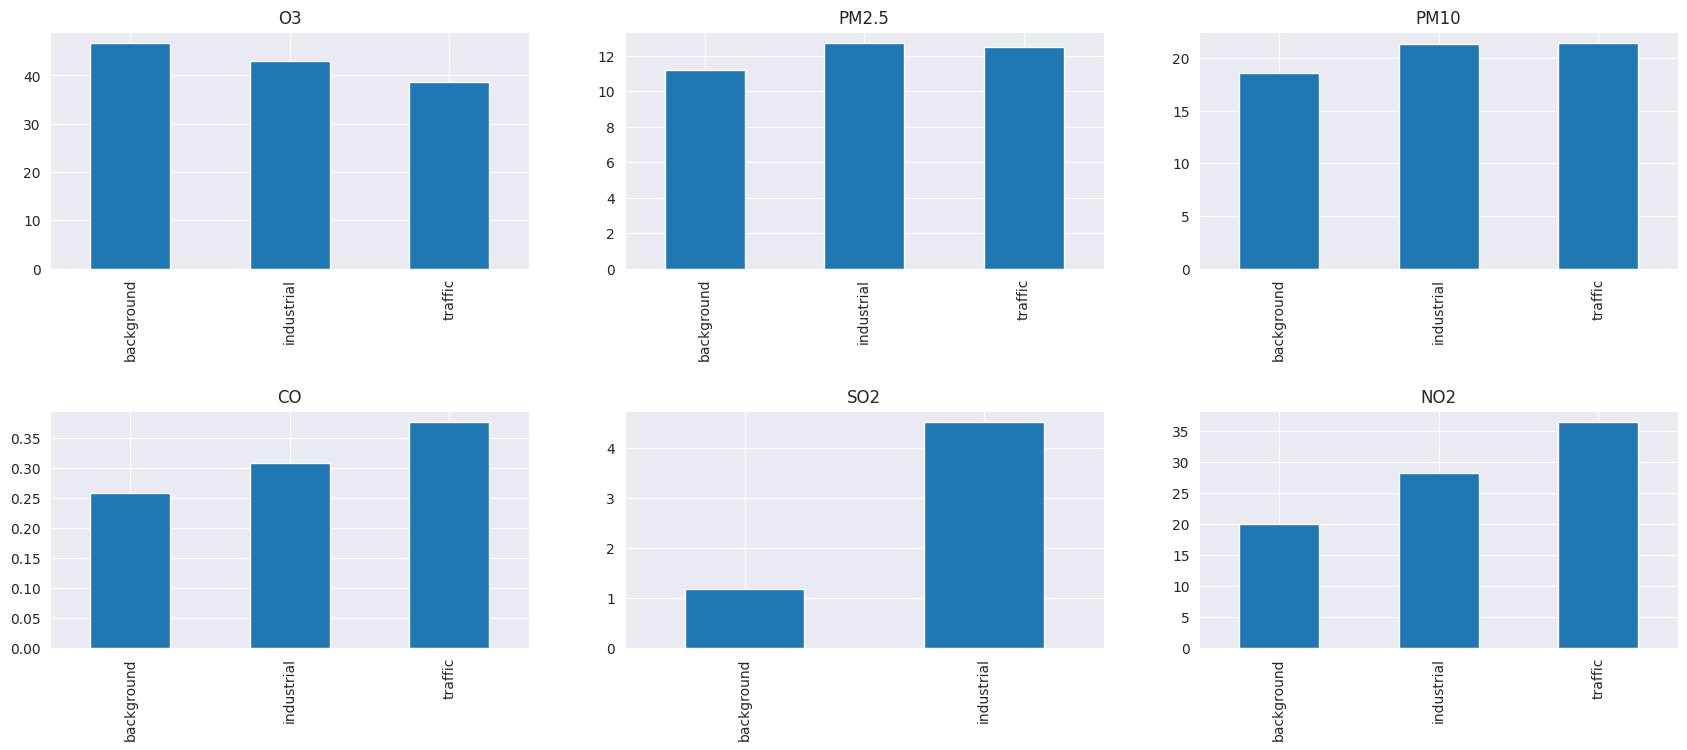

In [42]:
fig = plt.figure(figsize=(21, 8))
station_types = ['background', 'industrial', 'traffic']
for i in range(len(POL_CODES)):
    axn = fig.add_subplot(231 + i)
    df_list[i].groupby(['AirQualityStationType'], as_index=False)['Concentration'].mean().plot.bar(title = POL_NAMES[POL_CODES[i]], x='AirQualityStationType', xlabel='', ax=axn)
    plt.legend('', frameon=False)
plt.subplots_adjust(hspace=0.6)

*Выводы:*

1. Концентрации О3 для станций background несколько выше, но существенно для разных направленностей станций не отличаются.
2. Концентрации PM2.5, PM10, CO существенно для разных направленностей станций не отличаются, в industrial / traffic немного выше.
3. Данных о SO2 для станций traffic нет. Для industrial в 3 раза выше, чем для и background.
4. Концентрации NO2 в среднем почти в 2 раза выше для станций traffic, чем для background, и почти в 1,5 раза выше для станций industrial, чем для background

***
#### Временные ряды концентраций загрязнителей
***

##### Отображение временных рядов по загрязнителям

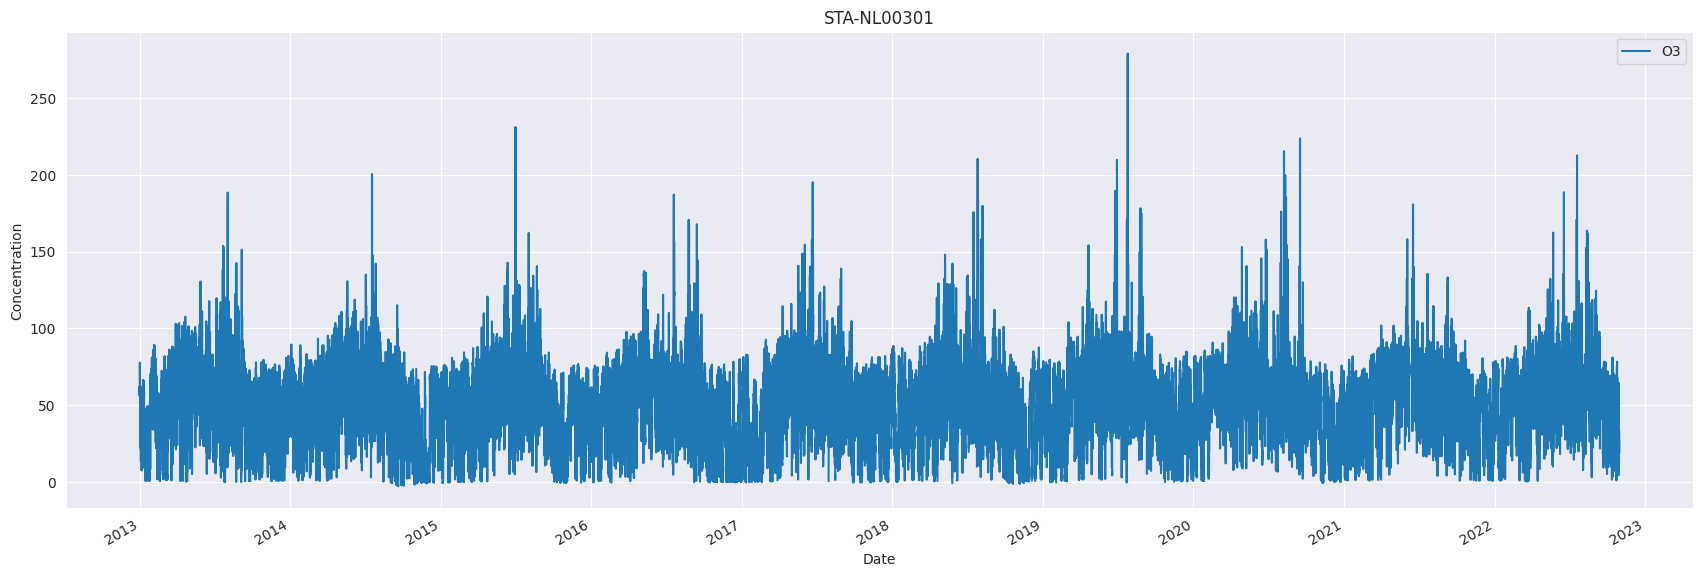

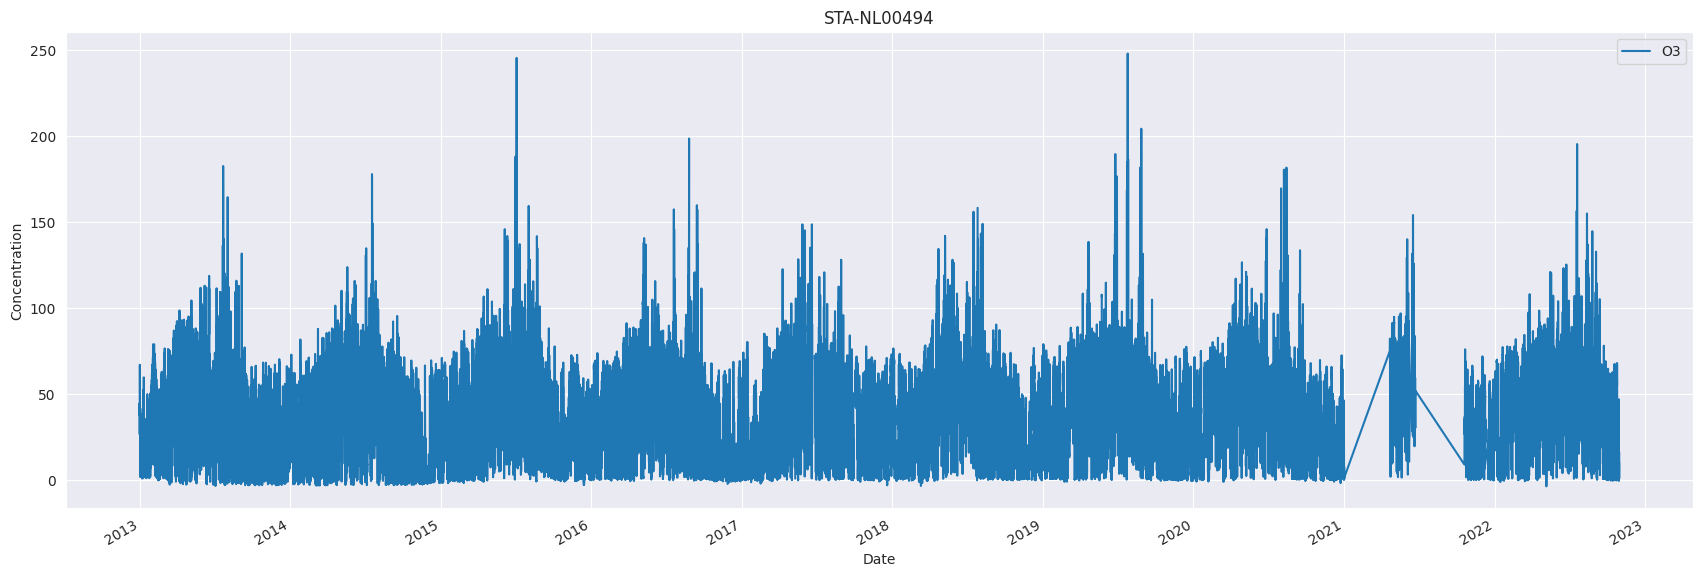

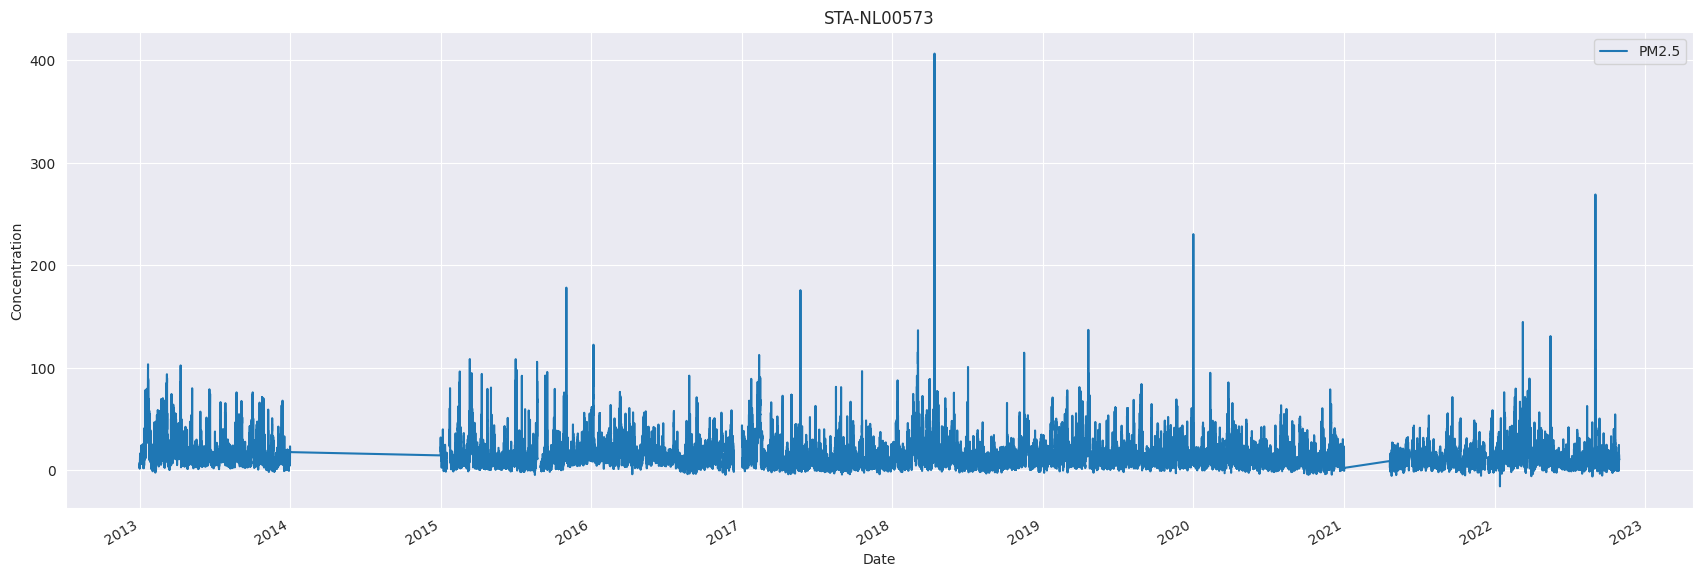

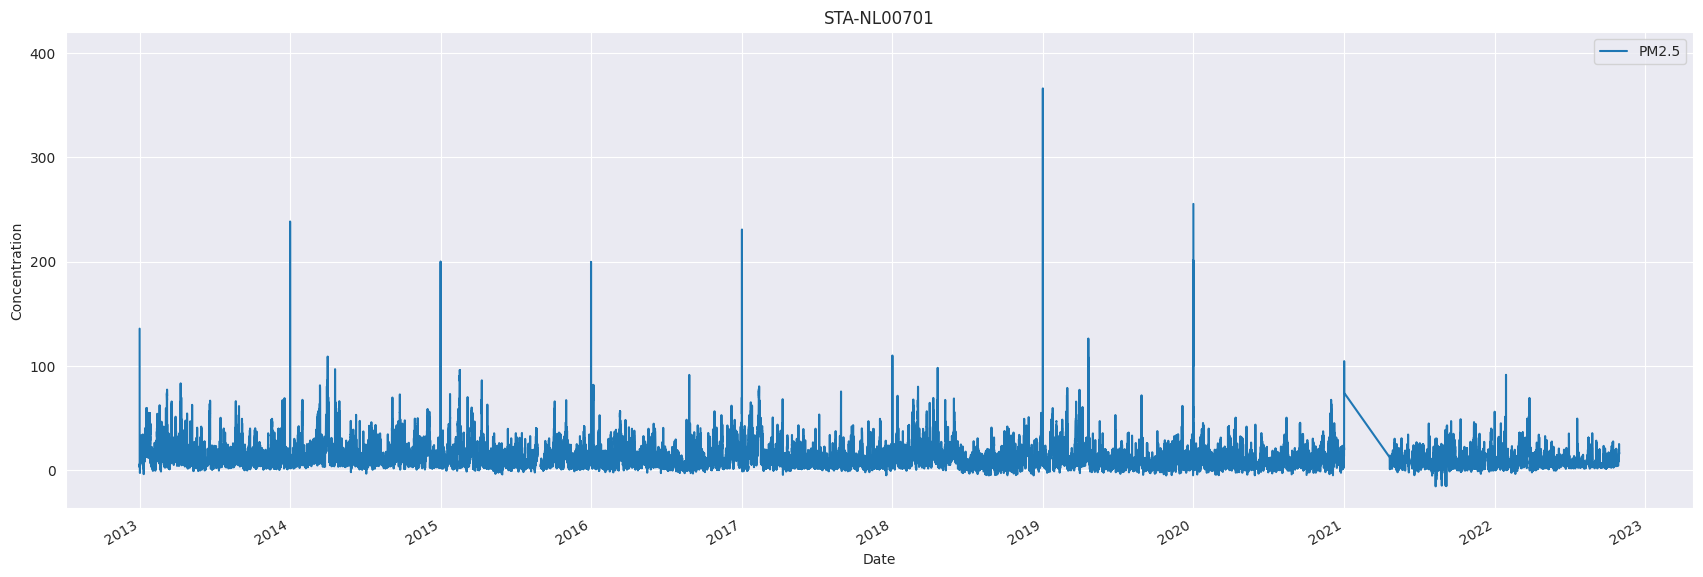

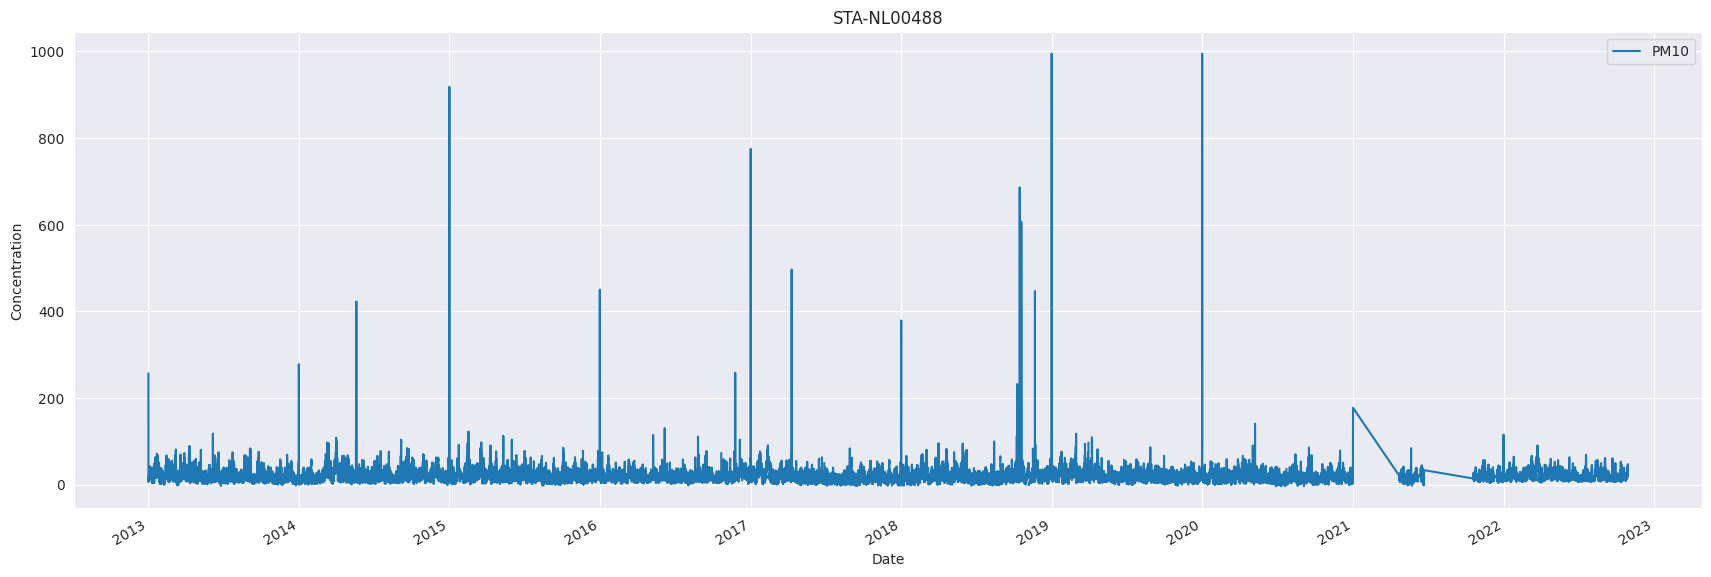

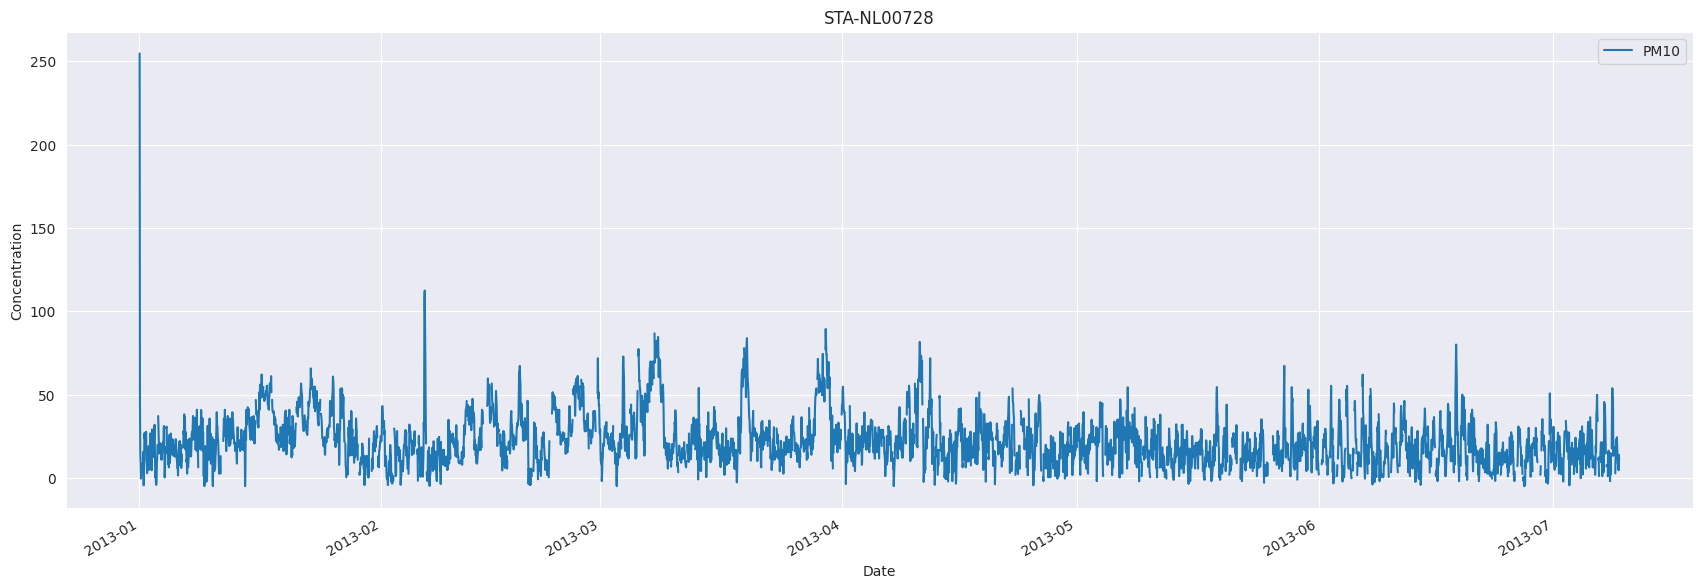

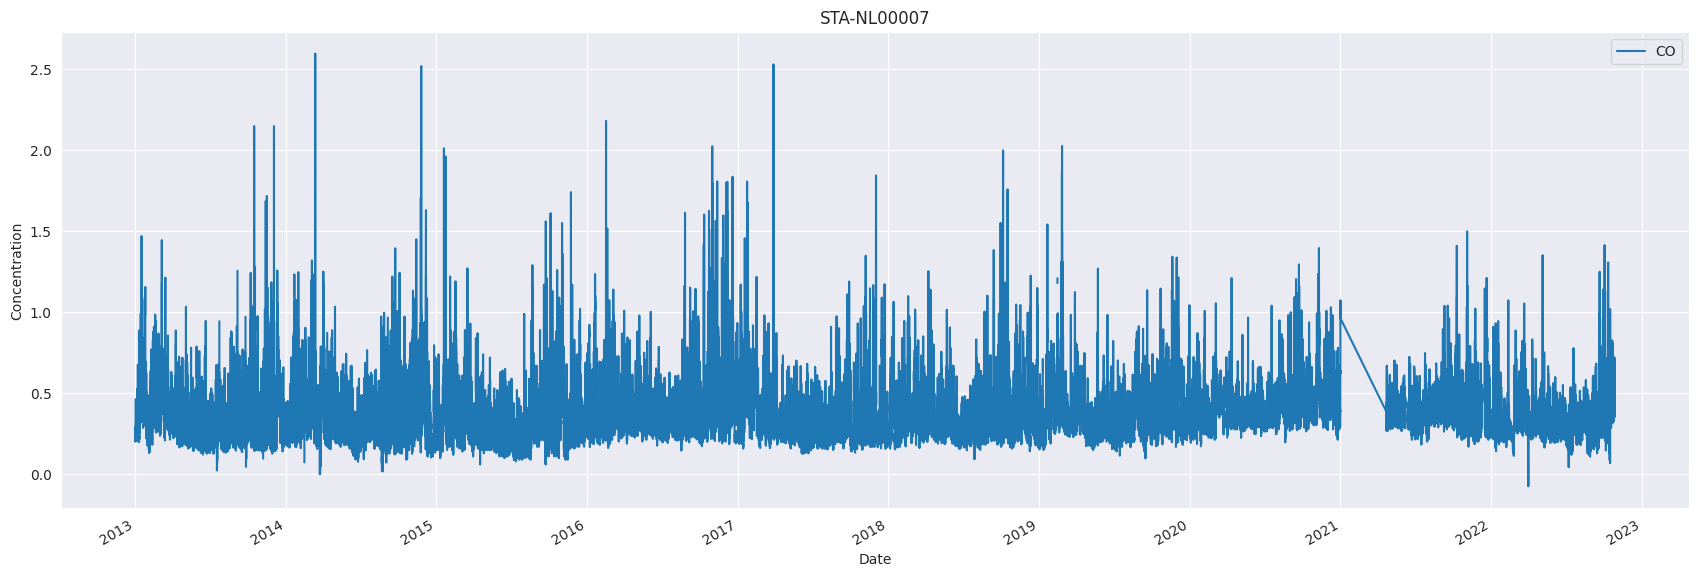

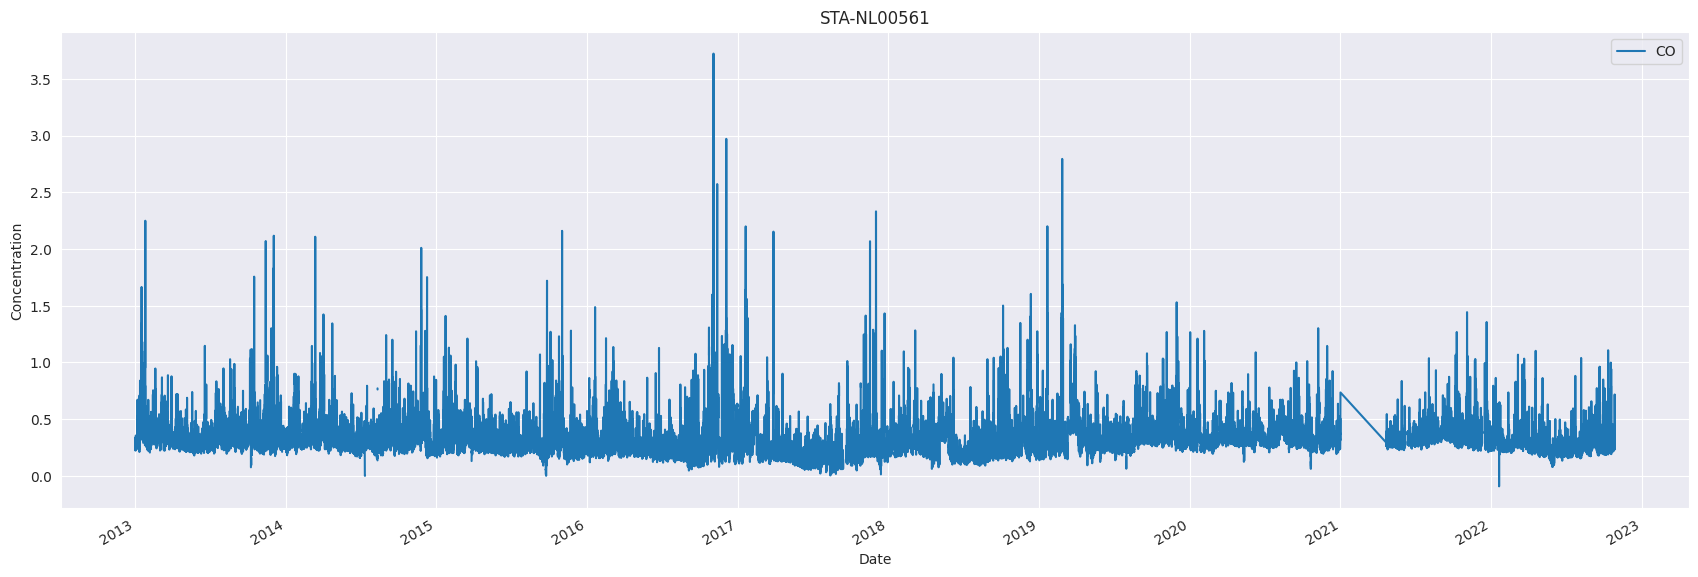

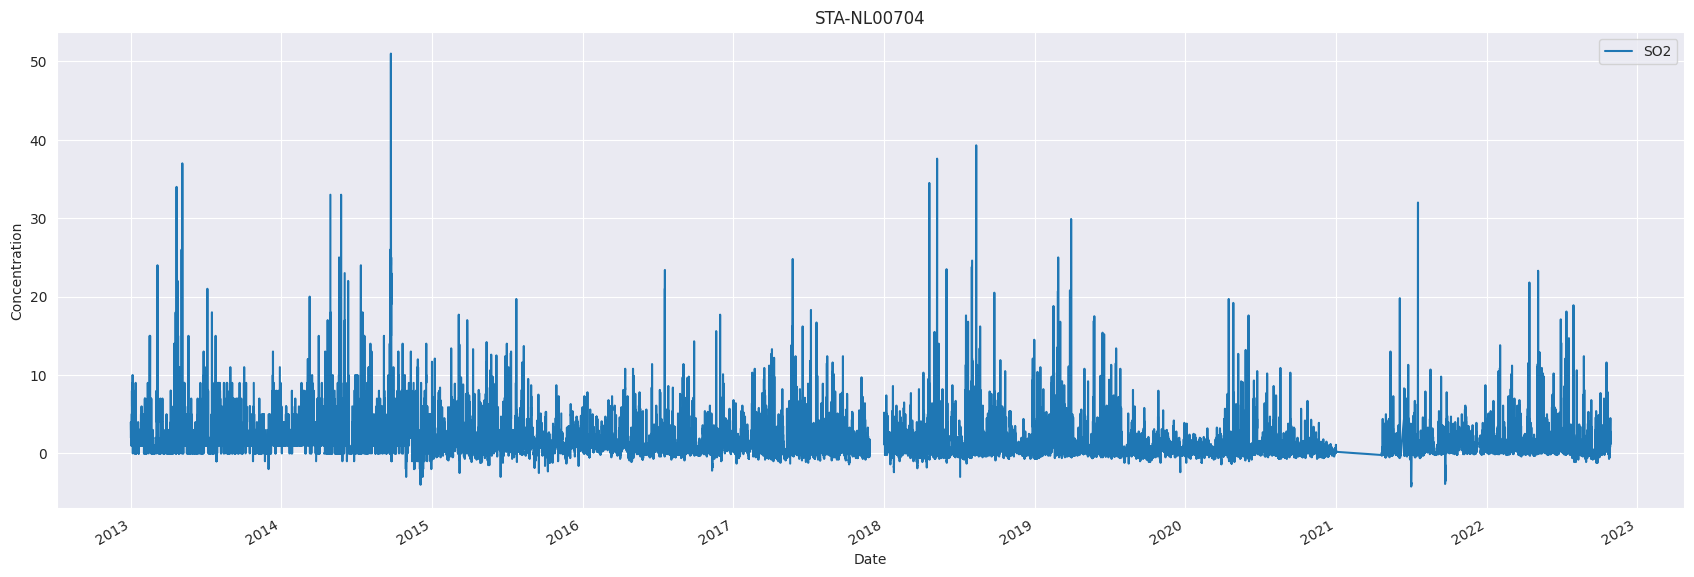

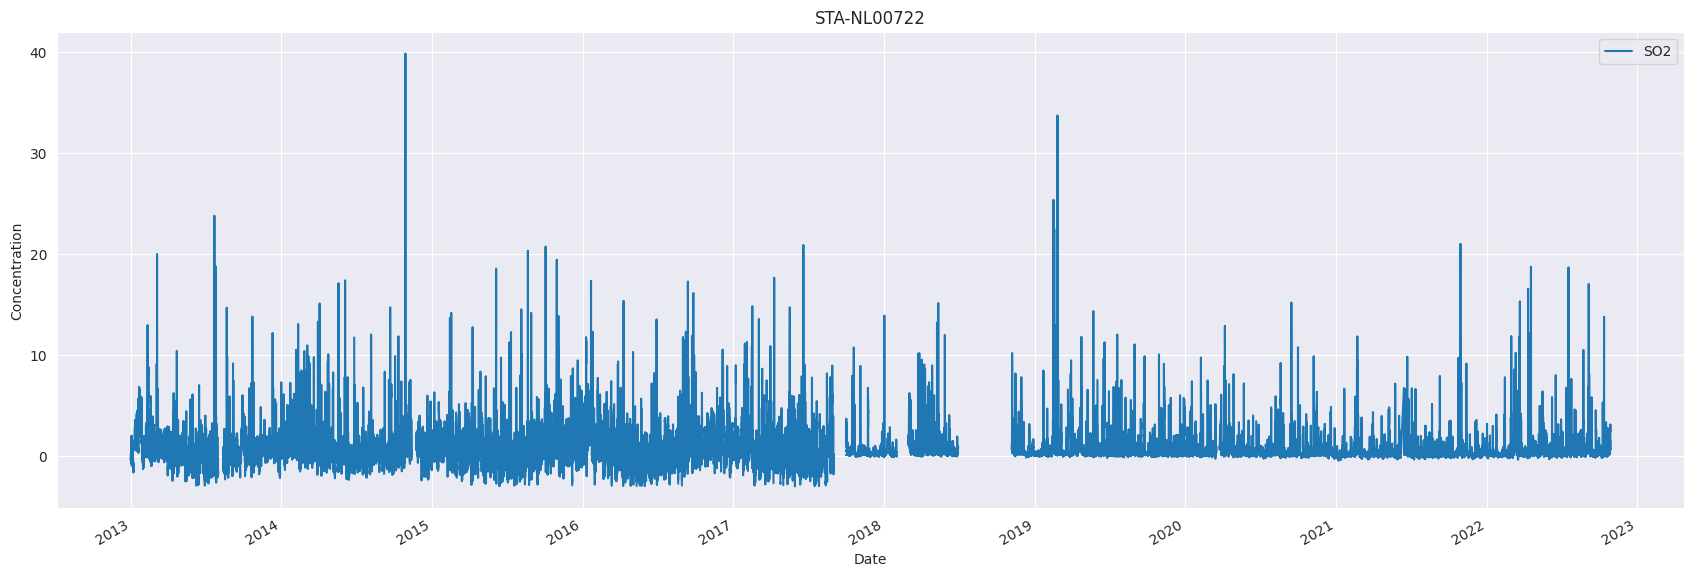

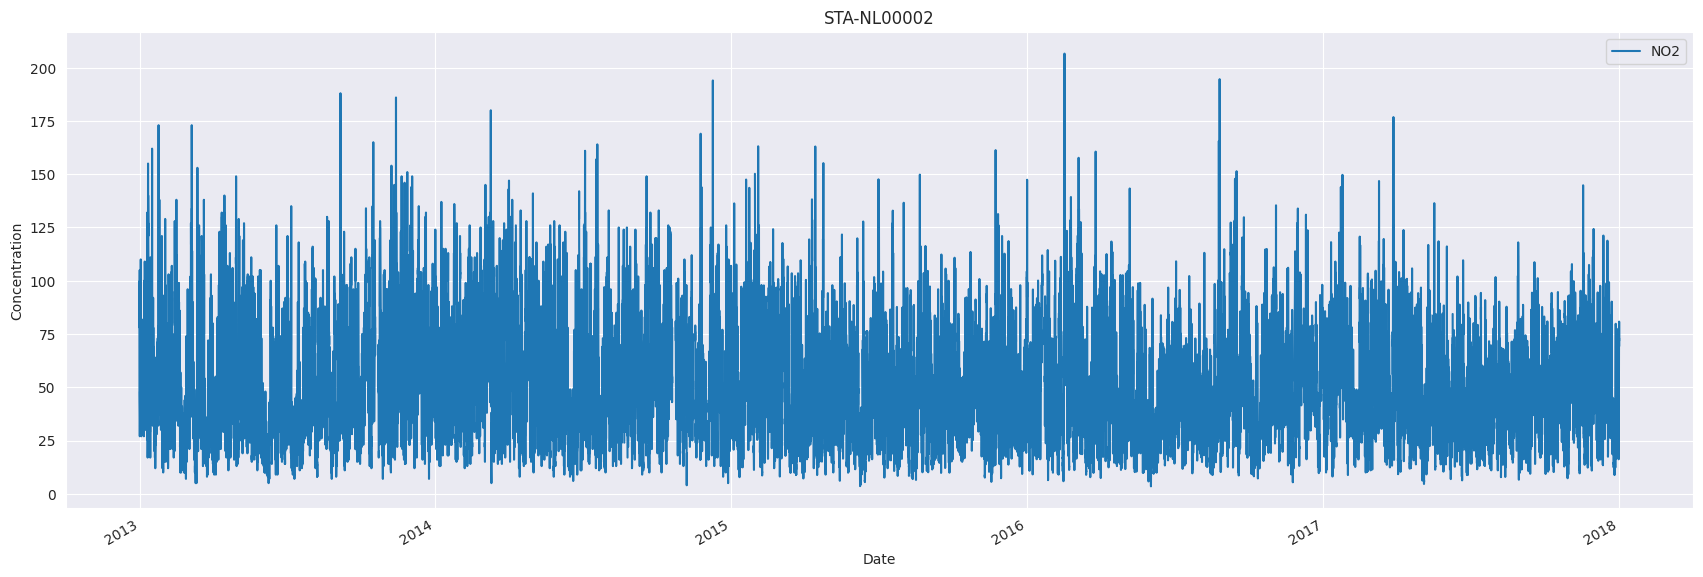

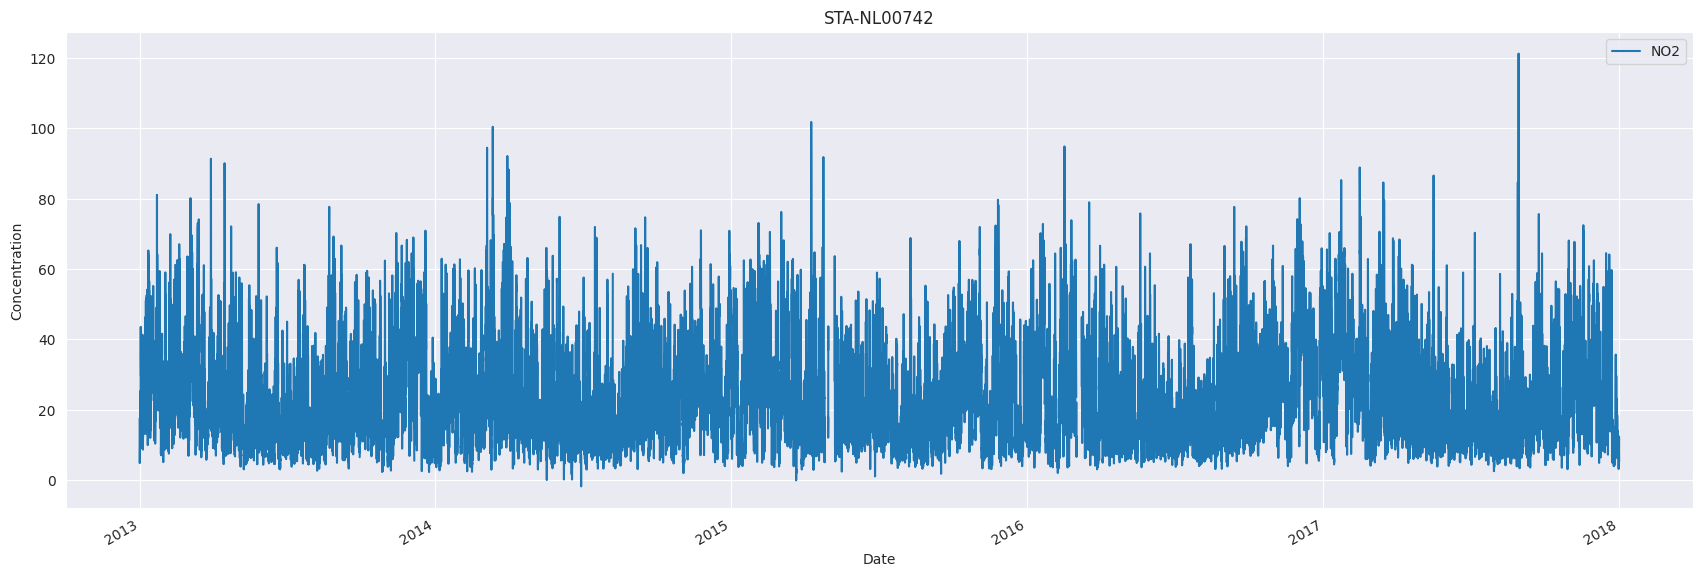

In [76]:
# for i in range(len(POL_CODES)):
#     pol = POL_NAMES[POL_CODES[i]]
#     df_ts.plot(x='DatetimeEnd', xlabel="Date", ylabel="Concentration", title=pol,  y=pol, c='tab:blue', figsize=(21,7), ax=plt.gca())
#     plt.show()

selected_stations = [['STA-NL00301', 'STA-NL00494'], ['STA-NL00573', 'STA-NL00701'], ['STA-NL00488', 'STA-NL00728'], ['STA-NL00007', 'STA-NL00561'], ['STA-NL00704', 'STA-NL00722'], ['STA-NL00002', 'STA-NL00742']]
for i in range(len(POL_CODES)):
    stations = df_list[i]['AirQualityStation'].unique()
    for j in range(2):
        s = selected_stations[i][j]
        axs = plt.gca()
        df_list[i][df_list[i]['AirQualityStation'] == s].plot(x='DatetimeEnd', xlabel="Date", ylabel="Concentration", title=s,  y='Concentration', c='tab:blue', figsize=(21,7), ax=axs)
        plt.legend([POL_NAMES[POL_CODES[i]]])
        plt.show()

*Выводы:*
1. На графике концентрации О3 видна сезонность с пиками летом и минимума зимой. Вероятно это связано с механизмом образования О3 через NOx соединения, которые могут выделяться при аграрных и вегетационных процессах. Преимущественно эти процессы приходятся на лето и высокие температуры. Также на лето приходятся выбросы, причем сравнивая 2 станции складывается впечатление, что выбросы приходятся на одни и те же даты. Возможно жо связано с какими-то массовыми сельхоз работами.
2. На графике концентрации PM2.5 также видна сезонность, но видна не так явно, требуется проверка. Небольшой подъем приходится на начало года. Поскольку PM2.5 активно выделяется при сжигании топлива, то повышенные концентрации могут быть связаны с активным отопительным сезоном, т.е. с периодами низких температур. Так же четко на начало каждого года приходятся огромные выбросы. Есть предположение, что это связано с рождественскими фейерверками.
3. График концентрации PM10 очень похож на график PM2.5, что и понятно, потому что эти загрязнители производятся одними и теми же технологическими и природными процессами. Но для PM10 есть большие выбросы на начало года, но есть и другие. Надо посмотреть на какие даты они приходятся. Так же приведен нетипичный график, станция находится на границе города по тем же координатам, что и станция измерения PM2.5 с графика с "рождественскими" выбросами, что неожиданно. Может быть оборудование настроено иначе.
4. График концентрации CO также на первый взгляд имеет сезонность с подъемами зимой и спадами летом. Вероятно это связано с более активным сжиганием топлива в отопительные сезоны.
5. График концентрации SO2 возможно имеет убывающий тренд. Кажется также, что есть некоторая сезонность с убыванием концентрации летом. На одном из графиков видно, что внезапно изменилась структура данных, стало меньше отрицательных значений. Возможно сменили оборудование.
6. На график концентрации NO2 видно, что выбросы невелики. Это можно объяснить тем, что основным источником NO2 являются дизельные двигатели и ситуаций, когда их начинают внезапно использовать намного больше обычного, нетипичны. Возможно есть сезонность с подъемом зимой и спуском летом, что можно также объяснить особенностями работы двигателей при низких температурах. Данных после 2018 года нет, объяснения этому пока не найдены.


In [30]:
for i in range(len(POL_CODES)):
    file_path = os.path.join(CSV_EDA_PATH, f'{POL_NAMES[POL_CODES[i]]}.csv')
    df_list[i].to_csv(file_path)